## **Project Name** - ML Prediction Moder for Schools Requirement.



##### **Project Type**    - EDA/Classification/Supervised
##### **Contribution**    - Individual

# **Problem Statement**


**We have the schools data by district and we want to find the districts where there is utmost need for new schools using Machine Learning Prediction Models.**

# ***Let's Begin !***

## ***1. Know Your Data***

We have already cleaned and transformed our datasets in Excel hence they are now ready to be loaded here.

### Import Libraries

In [1]:
# Importing required Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


### Dataset Loading

In [2]:
# Loading both Datasets
school_df = pd.read_excel('School_worksheet.xlsx')
population_df = pd.read_excel('Population_worksheet.xlsx')

### Dataset First View

In [3]:
# Dataset First Look
school_df.head()

region           district           mahalla     school_type  \
0  Toshkent  akkurgan district     zarafshon mfy  secondary_1_11   
1  Toshkent  akkurgan district         suvti mfy  secondary_1_11   
2  Toshkent  akkurgan district     madaniyat mfy  secondary_1_11   
3  Toshkent  akkurgan district       boyguli mfy  secondary_1_11   
4  Toshkent  akkurgan district  qoʻrgʻontepa mfy  secondary_1_11   

  the_year_the_school_was_built  capacity  shifts  total_number_of_students  \
0                    1992-01-01       422       2                       205   
1                    1992-01-01       352       1                       227   
2                    1992-01-01       440       2                       723   
3                    1992-01-01       422       2                       419   
4                    1992-01-01       660       2                       685   

   boys  girls water_and_handwashing_facilities_with_soap_near_toilets  \
0   105    100                                                 no        
1   108    119                                         water_soap        
2   363    360                                                 no        
3   203    216                                                yes        
4   344    341                                                yes        

  availability_of_water_at_school  transport_stops_nearby (meter)  \
0                       technical                             NaN   
1                              no                             NaN   
2                       technical                           200.0   
3                             yes                           200.0   
4                              no                             NaN   

  infrastructure_of_your_school state_of_your_school  
0                            no            satisfied  
1                           yes            satisfied  
2                      not_sure          unsatisfied  
3                           yes            satisfied  
4                            no          unsatisfied

In [4]:
population_df.head()

code           district  yil_2010  yil_2011  yil_2012  yil_2013  \
0  1727206  akkurgan district      95.0      93.5      94.7      95.3   
1  1735204  amudarya district     163.5     172.3     174.4     176.8   
2     1703     andijan region    2549.1    2672.3    2714.2    2756.4   
3  1703401       andijon city     373.8     388.4     393.5     398.2   
4  1703203   andijon district     210.9     217.6     221.5     226.1   

   yil_2014  yil_2015  yil_2016  yil_2017  yil_2018  yil_2019  yil_2020  \
0      96.7      98.1      99.6     100.7     102.0     103.4     105.0   
1     179.1     182.2     185.7     188.7     191.6     195.3     199.2   
2    2805.5    2857.3    2910.5    2962.5    3011.7    3066.9    3127.7   
3     403.9     410.4     416.3     421.9     427.5     433.9     441.7   
4     230.4     235.0     240.7     246.0     250.6     256.2     261.8   

   yil_2021  yil_2022  yil_2023  Latitude  Longitude  
0     106.4     108.3     110.2   40.7377    69.0596  
1     201.4     204.8     208.6   41.5786    61.0713  
2    3188.1    3253.5    3322.7   40.7275    72.3561  
3     450.0     458.5     468.1   40.7821    72.3442  
4     267.1     273.8     280.0   40.7875    72.3500

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(school_df.shape)
print(population_df.shape)

(8364, 15)
(221, 18)


We will start working with School Dataset as it is the main dataset where we need to perform various operations.

### Dataset Information

In [6]:
# Dataset Info
school_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8364 entries, 0 to 8363
Data columns (total 15 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   region                                                   8364 non-null   object        
 1   district                                                 8364 non-null   object        
 2   mahalla                                                  8364 non-null   object        
 3   school_type                                              8364 non-null   object        
 4   the_year_the_school_was_built                            8364 non-null   datetime64[ns]
 5   capacity                                                 8364 non-null   int64         
 6   shifts                                                   8364 non-null   int64         
 7   total_number_of_students                           

The information of the dataset is as follows.
- We have 8 object type columns i.e Categorical Columns
- We have 6 Numeric type columns
- We have 1 datetime column

We also have few null values in: transport_stops_nearby as we replaced the 0 values in this column to null values in Excel.

#### Duplicate Values

In [7]:
# Dataset Duplicate Values
school_df.duplicated().value_counts()

False    8364
Name: count, dtype: int64

Here we can see that there are no duplicated rows, however there is no unique identifier in this dataset hence we can't directly seek out duplicate values if any.

#### Missing Values/Null Values

Looking at the Info function we can see that we are having few null values in this column:-
- transport_stops_nearby (meter)

Other few columns are having 1 null value each hence we can simply ignore these values as it is only 1 it won't be a problem for us. We can impute them later while data preparation.

In [8]:
# Missing Values/Null Values Count
# Let's check for the null values in that column and handle them accordingly
school_df['transport_stops_nearby (meter)'].isna().value_counts()

# As we can see it is a huge number of null values hence in this case we need to fill these null values.
# Let's check which are these values in our datasets.
school_df.loc[school_df['transport_stops_nearby (meter)'].isna()]


region           district           mahalla     school_type  \
0     Toshkent  akkurgan district     zarafshon mfy  secondary_1_11   
1     Toshkent  akkurgan district         suvti mfy  secondary_1_11   
4     Toshkent  akkurgan district  qoʻrgʻontepa mfy  secondary_1_11   
5     Toshkent  akkurgan district    eltamgʻali mfy  secondary_1_11   
7     Toshkent  akkurgan district    eltamgʻali mfy  secondary_1_11   
...        ...                ...               ...             ...   
8319    Jizzax     zomin district      istiqlol mfy  secondary_1_11   
8326    Jizzax     zomin district       gulshan mfy  secondary_1_11   
8335    Jizzax     zomin district      beshkubi mfy  secondary_1_11   
8350    Jizzax     zomin district     nurafshon mfy  secondary_1_11   
8361    Jizzax     zomin district      to'rttom mfy  secondary_1_11   

     the_year_the_school_was_built  capacity  shifts  \
0                       1992-01-01       422       2   
1                       1992-01-01       352       1   
4                       1992-01-01       660       2   
5                       1992-01-01       240       1   
7                       1992-01-01       460       2   
...                            ...       ...     ...   
8319                    1972-01-01       630       1   
8326                    1972-01-01       530       2   
8335                    1972-01-01       350       2   
8350                    1972-01-01       520       1   
8361                    1972-01-01       120       2   

      total_number_of_students  boys  girls  \
0                          205   105    100   
1                          227   108    119   
4                          685   344    341   
5                          240   119    121   
7                          597   292    305   
...                        ...   ...    ...   
8319                       785   282    503   
8326                       649   317    332   
8335                       220   110    110   
8350                       454   227    227   
8361                       111    55     56   

     water_and_handwashing_facilities_with_soap_near_toilets  \
0                                                    no        
1                                            water_soap        
4                                                   yes        
5                                                    no        
7                                                    no        
...                                                 ...        
8319                                                yes        
8326                                                 no        
8335                                                yes        
8350                                                yes        
8361                                                yes        

     availability_of_water_at_school  transport_stops_nearby (meter)  \
0                          technical                             NaN   
1                                 no                             NaN   
4                                 no                             NaN   
5                          technical                             NaN   
7                                yes                             NaN   
...                              ...                             ...   
8319                             yes                             NaN   
8326                             yes                             NaN   
8335                             yes                             NaN   
8350                             yes                             NaN   
8361                       technical                             NaN   

     infrastructure_of_your_school state_of_your_school  
0                               no            satisfied  
1                              yes            satisfied  
4                               no          unsatisfied  
5                               no          unsatis

In [9]:
# Let's create a new dataframe of the null values
null_df = school_df.loc[school_df['transport_stops_nearby (meter)'].isna()]

# Let's create a list of all the "mahallas" having these null values in the transport column
null_mahallas = list(null_df['mahalla'].unique())

# Now let's check the average distance of transport in these mahallas
filtered_df = school_df[school_df['mahalla'].isin(null_mahallas)]
average_distance = filtered_df.groupby('mahalla').agg({'transport_stops_nearby (meter)': 'mean'})

average_distance_dict = average_distance['transport_stops_nearby (meter)'].to_dict()

# Defining a function to fill null values based on the 'mahalla'
def fill_nulls(row):
    if pd.isna(row['transport_stops_nearby (meter)']):
        return average_distance_dict.get(row['mahalla'], row['transport_stops_nearby (meter)'])
    return row['transport_stops_nearby (meter)']

# Applying the function to fill the null values
school_df['transport_stops_nearby (meter)'] = school_df.apply(fill_nulls, axis=1)

In [10]:
average_distance

transport_stops_nearby (meter)
mahalla                                       
8 mart mfy                                 NaN
a.jomiy mfy                              500.0
a.kodiriy mfy                              NaN
a.navioiy mfy                            320.0
a.navoiy mfy                             200.0
...                                        ...
аfrosiyob mfy                              NaN
аmir temur mfy                             NaN
аrpapoya mfy                             350.0
аvg‘on mfy                                 NaN
аyritom mfy                                NaN

[1886 rows x 1 columns]

In [11]:
school_df.query('mahalla == "a.navioiy mfy"')

region           district        mahalla     school_type  \
1876  Jizzax  do'stlik district  a.navioiy mfy  secondary_1_11   
2707  Jizzax       jizzakh city  a.navioiy mfy  secondary_1_11   
8309  Jizzax     zomin district  a.navioiy mfy  secondary_1_11   
8313  Jizzax     zomin district  a.navioiy mfy  secondary_1_11   
8316  Jizzax     zomin district  a.navioiy mfy  secondary_1_11   
8360  Jizzax     zomin district  a.navioiy mfy  secondary_1_11   

     the_year_the_school_was_built  capacity  shifts  \
1876                    1956-01-01      1200       2   
2707                    1963-01-01       760       1   
8309                    1972-01-01       640       2   
8313                    1972-01-01       570       2   
8316                    1972-01-01       520       1   
8360                    1972-01-01       824       2   

      total_number_of_students  boys  girls  \
1876                      1950  1022    928   
2707                       798   432    366   
8309                       788   426    362   
8313                       650   339    311   
8316                       368   182    186   
8360                       890   425    465   

     water_and_handwashing_facilities_with_soap_near_toilets  \
1876                                                yes        
2707                                         water_soap        
8309                                                yes        
8313                                                yes        
8316                                                yes        
8360                                                yes        

     availability_of_water_at_school  transport_stops_nearby (meter)  \
1876                             yes                           200.0   
2707                             yes                           200.0   
8309                             yes                           500.0   
8313                             yes                           500.0   
8316                       technical                           320.0   
8360                             yes                           200.0   

     infrastructure_of_your_school state_of_your_school  
1876                      not_sure            satisfied  
2707                           yes            satisfied  
8309                            no          unsatisfied  
8313                      not_sure          unsatisfied  
8316                           yes            satisfied  
8360                           yes            satisfied

As we can see here the null value has been successfully filled.

In [12]:
# Now let's verify
school_df.loc[school_df['transport_stops_nearby (meter)'].isna()]

region                  district           mahalla     school_type  \
4     Toshkent         akkurgan district  qoʻrgʻontepa mfy  secondary_1_11   
15    Toshkent         akkurgan district      xamzabod mfy  secondary_1_11   
22    Toshkent         akkurgan district  qoʻrgʻontepa mfy  secondary_1_11   
36    Toshkent         akkurgan district       tolovul mfy  secondary_1_11   
48          QR         amudarya district       toshyop ofy  secondary_1_11   
...        ...                       ...               ...             ...   
8206  Toshkent  yuqori chirchiq district       iyk-ota mfy  secondary_1_11   
8234  Toshkent         zangiota district      kuyoshli mfy  secondary_1_11   
8253  Toshkent         zangiota district     eski kala mfy  secondary_1_11   
8264  Toshkent         zangiota district      ulugʻbek mfy  secondary_1_11   
8299    Jizzax          zarbdor district       oqbuloq mfy  secondary_1_11   

     the_year_the_school_was_built  capacity  shifts  \
4                       1992-01-01       660       2   
15                      1992-01-01       420       1   
22                      1992-01-01       420       2   
36                      1992-01-01       216       1   
48                      1972-01-01       850       2   
...                            ...       ...     ...   
8206                    2021-01-01       216       2   
8234                    1980-01-01       160       2   
8253                    1980-01-01       320       2   
8264                    1980-01-01      1250       2   
8299                    1971-01-01       440       2   

      total_number_of_students  boys  girls  \
4                          685   344    341   
15                         219   116    103   
22                         501   250    251   
36                         221   106    115   
48                         655   346    309   
...                        ...   ...    ...   
8206                       208   107    101   
8234                       186    94     92   
8253                       572   304    268   
8264                      1866   931    935   
8299                       772   381    391   

     water_and_handwashing_facilities_with_soap_near_toilets  \
4                                                   yes        
15                                                  yes        
22                                                  yes        
36                                                  yes        
48                                                  yes        
...                                                 ...        
8206                                                yes        
8234                                                yes        
8253                                                yes        
8264                                                 no        
8299                                                yes        

     availability_of_water_at_school  transport_stops_nearby (meter)  \
4                                 no                             NaN   
15                               yes                             NaN   
22                               yes                             NaN   
36                         technical                             NaN   
48                               yes                             NaN   
...                              ...                             ...   
8206                       technical                             NaN   
8234                             yes                             NaN   
8253                             yes                             NaN   
8264                             yes                             NaN   
8299                             yes                             NaN   

     infrastructure_of_your_school state_of_your_school  
4                               no          unsatisfied  
15                             yes            satisfied  
22                       

As we can see we are able to fill the NA values of more than half of the rows.
We were having null values in transport distance, so we filled the values with the average distance as per each mahalla in our data frame.
Initially we had 2993 rows now we have 1141. We're able to successfully fill the 1852 null values.
For the rest of the values we can fill in the average of the total. 

In [13]:
overall_average_distance = school_df['transport_stops_nearby (meter)'].mean()
school_df['transport_stops_nearby (meter)'].fillna(overall_average_distance, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13132\3403658265.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  school_df['transport_stops_nearby (meter)'].fillna(overall_average_distance, inplace=True)


### What did you know about your dataset?

#### The information about our given dataset is as follows:-
**Data Types**
- We have 8 object type columns i.e Categorical Columns
- We have 6 Numeric type columns
- We have 1 datetime column

**Shape**
- School Dataset has: 8364 rows and 15 columns
- Population Dataset has: 221 rows and 18 columns

**Duplicates**
- Overall there are no duplicated values
- As we are not dealing with any identifiers there can be no column specific duplicates

**Missing Values**
- The transport distance column was having around 3000 missing values
- The missing values have been handled, by filling average values as per each mahalla respectively.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
school_df.columns

Index(['region', 'district', 'mahalla', 'school_type',
       'the_year_the_school_was_built', 'capacity', 'shifts',
       'total_number_of_students', 'boys', 'girls',
       'water_and_handwashing_facilities_with_soap_near_toilets',
       'availability_of_water_at_school', 'transport_stops_nearby (meter)',
       'infrastructure_of_your_school', 'state_of_your_school'],
      dtype='object')

In [15]:
# Dataset Describe
school_df.describe()

the_year_the_school_was_built     capacity       shifts  \
count                           8364  8364.000000  8364.000000   
mean   1988-03-08 22:15:09.038737472   505.787542     1.737805   
min              1908-01-01 00:00:00     0.000000     1.000000   
25%              1975-01-01 00:00:00   250.000000     1.000000   
50%              1987-01-01 00:00:00   420.000000     2.000000   
75%              2006-01-01 00:00:00   640.000000     2.000000   
max              2024-01-01 00:00:00  4700.000000     3.000000   
std                              NaN   325.665851     0.448736   

       total_number_of_students         boys        girls  \
count               8364.000000  8364.000000  8364.000000   
mean                 638.376136   319.826399   318.549737   
min                    3.000000     0.000000     0.000000   
25%                  303.000000   151.000000   150.000000   
50%                  511.500000   254.000000   255.000000   
75%                  823.000000   409.000000   412.000000   
max                 7135.000000  6115.000000  3344.000000   
std                  492.625335   260.546465   245.985012   

       transport_stops_nearby (meter)  
count                     8364.000000  
mean                       290.664483  
min                        200.000000  
25%                        200.000000  
50%                        200.000000  
75%                        350.000000  
max                        500.000000  
std                        120.006171

### Variables Description

#### Let's go through our numerical columns one by one and point out few important pointers.

**The year the school was built**
- We can see the dates are all 01-01 hence we can take only the years from this column.
- The time is also not relevant hence we can simply focus on the year.
- We can clearly see that:
    - the min year is 1908 
    - 50% of data as per years goes till 1987 
    - 25% of data goes till 1975
    We can see the year gap between 0%-25% is huge however the gap between 25%-50% is not much, which means that the frequency to build schools was less till 1975 and it started increasing after that.

**Capacity**
- Here we can see the 50% data is evenly disributed approx.
- However the next 25%(i.e. 75%) is a bit less, but considerable.
- The max as we see is of course an outlier and we can say it has to be treated as an exception.
- If we check the standard deviation of this column we can clearly see that this column is spread over a wide range and is not saturated, however it can also be due to few outliers that may be impacting this, we need to check that.

**Shifts**
- Looking at the shifts we can see it is a pretty direct column and is evenly distributed.
- We have 1, 2, and 3 shifts.

**Total number of Students**
- It is a sum of the columns boys and girls.
- The min value is pretty concerning and it says 3 which clearly means it is an outlier.
- Here the data distribution as we can see is around 250-300.
- However here also the difference between the 75% and Max value is huge which means here we can see the upper limit outliers.
- Here also we can see there is a huge deviation in our data range as per the total number.

**Boys and Girls**
- As we can see these columns are very closely divided and they are almost even.
- However there is a huge difference at the max values, other than that they are almost evenly divided as we can see.

**Transport Stops**
- This is the columne where we were having the most missing values
- We will have to be careful at the time of consideration.
- This column is having most data around 200 and the max is 500 hence we can say that there is a good connectivity as the transport stops are nearly within 500 meters and mostly within 200 meters.


In [16]:
# Year Column
school_df['the_year_the_school_was_built'] = school_df['the_year_the_school_was_built'].dt.year

## ***3.Data Wrangling***

### **Cleaning and formatting our data**

In [17]:
# Let's take a look at our dataset once
school_df.head()

region           district           mahalla     school_type  \
0  Toshkent  akkurgan district     zarafshon mfy  secondary_1_11   
1  Toshkent  akkurgan district         suvti mfy  secondary_1_11   
2  Toshkent  akkurgan district     madaniyat mfy  secondary_1_11   
3  Toshkent  akkurgan district       boyguli mfy  secondary_1_11   
4  Toshkent  akkurgan district  qoʻrgʻontepa mfy  secondary_1_11   

   the_year_the_school_was_built  capacity  shifts  total_number_of_students  \
0                           1992       422       2                       205   
1                           1992       352       1                       227   
2                           1992       440       2                       723   
3                           1992       422       2                       419   
4                           1992       660       2                       685   

   boys  girls water_and_handwashing_facilities_with_soap_near_toilets  \
0   105    100                                                 no        
1   108    119                                         water_soap        
2   363    360                                                 no        
3   203    216                                                yes        
4   344    341                                                yes        

  availability_of_water_at_school  transport_stops_nearby (meter)  \
0                       technical                      350.000000   
1                              no                      500.000000   
2                       technical                      200.000000   
3                             yes                      200.000000   
4                              no                      290.664483   

  infrastructure_of_your_school state_of_your_school  
0                            no            satisfied  
1                           yes            satisfied  
2                      not_sure          unsatisfied  
3                           yes            satisfied  
4                            no          unsatisfied

In [18]:
# Let's create a copy of our dataframe so that the original school dataframe remains the same
work_df = school_df.copy()
work_df.head()

region           district           mahalla     school_type  \
0  Toshkent  akkurgan district     zarafshon mfy  secondary_1_11   
1  Toshkent  akkurgan district         suvti mfy  secondary_1_11   
2  Toshkent  akkurgan district     madaniyat mfy  secondary_1_11   
3  Toshkent  akkurgan district       boyguli mfy  secondary_1_11   
4  Toshkent  akkurgan district  qoʻrgʻontepa mfy  secondary_1_11   

   the_year_the_school_was_built  capacity  shifts  total_number_of_students  \
0                           1992       422       2                       205   
1                           1992       352       1                       227   
2                           1992       440       2                       723   
3                           1992       422       2                       419   
4                           1992       660       2                       685   

   boys  girls water_and_handwashing_facilities_with_soap_near_toilets  \
0   105    100                                                 no        
1   108    119                                         water_soap        
2   363    360                                                 no        
3   203    216                                                yes        
4   344    341                                                yes        

  availability_of_water_at_school  transport_stops_nearby (meter)  \
0                       technical                      350.000000   
1                              no                      500.000000   
2                       technical                      200.000000   
3                             yes                      200.000000   
4                              no                      290.664483   

  infrastructure_of_your_school state_of_your_school  
0                            no            satisfied  
1                           yes            satisfied  
2                      not_sure          unsatisfied  
3                           yes            satisfied  
4                            no          unsatisfied

As we can see that we have capacity column which is the Capacity of the school per shift, hence we will create a new column in with the total capacity of the school.

In [19]:
# Creating a new column total_capacity = (capacity)*(shifts)
work_df['total_capacity'] = (work_df['capacity'])*(work_df['shifts'])
work_df.head()

region           district           mahalla     school_type  \
0  Toshkent  akkurgan district     zarafshon mfy  secondary_1_11   
1  Toshkent  akkurgan district         suvti mfy  secondary_1_11   
2  Toshkent  akkurgan district     madaniyat mfy  secondary_1_11   
3  Toshkent  akkurgan district       boyguli mfy  secondary_1_11   
4  Toshkent  akkurgan district  qoʻrgʻontepa mfy  secondary_1_11   

   the_year_the_school_was_built  capacity  shifts  total_number_of_students  \
0                           1992       422       2                       205   
1                           1992       352       1                       227   
2                           1992       440       2                       723   
3                           1992       422       2                       419   
4                           1992       660       2                       685   

   boys  girls water_and_handwashing_facilities_with_soap_near_toilets  \
0   105    100                                                 no        
1   108    119                                         water_soap        
2   363    360                                                 no        
3   203    216                                                yes        
4   344    341                                                yes        

  availability_of_water_at_school  transport_stops_nearby (meter)  \
0                       technical                      350.000000   
1                              no                      500.000000   
2                       technical                      200.000000   
3                             yes                      200.000000   
4                              no                      290.664483   

  infrastructure_of_your_school state_of_your_school  total_capacity  
0                            no            satisfied             844  
1                           yes            satisfied             352  
2                      not_sure          unsatisfied             880  
3                           yes            satisfied             844  
4                            no          unsatisfied            1320

In [20]:
# Let's rearrange the columns as per our convenience.
work_df = work_df[['region', 'district', 'mahalla', 'school_type',
       'the_year_the_school_was_built', 'capacity','total_capacity', 'shifts',
       'total_number_of_students', 'boys', 'girls',
       'water_and_handwashing_facilities_with_soap_near_toilets',
       'availability_of_water_at_school', 'transport_stops_nearby (meter)',
       'infrastructure_of_your_school', 'state_of_your_school']]

In [21]:
# Now let's rename a few columns as they are too long
work_df.rename(columns={
   'the_year_the_school_was_built':'year',
    'total_number_of_students': 'total_students',
    'water_and_handwashing_facilities_with_soap_near_toilets': 'water_handwashing',
    'availability_of_water_at_school':'drinking_water',
    'transport_stops_nearby (meter)': 'transport_stop',
    'infrastructure_of_your_school': 'infrastructure'
}, inplace=True)
work_df.head()

region           district           mahalla     school_type  year  \
0  Toshkent  akkurgan district     zarafshon mfy  secondary_1_11  1992   
1  Toshkent  akkurgan district         suvti mfy  secondary_1_11  1992   
2  Toshkent  akkurgan district     madaniyat mfy  secondary_1_11  1992   
3  Toshkent  akkurgan district       boyguli mfy  secondary_1_11  1992   
4  Toshkent  akkurgan district  qoʻrgʻontepa mfy  secondary_1_11  1992   

   capacity  total_capacity  shifts  total_students  boys  girls  \
0       422             844       2             205   105    100   
1       352             352       1             227   108    119   
2       440             880       2             723   363    360   
3       422             844       2             419   203    216   
4       660            1320       2             685   344    341   

  water_handwashing drinking_water  transport_stop infrastructure  \
0                no      technical      350.000000             no   
1        water_soap             no      500.000000            yes   
2                no      technical      200.000000       not_sure   
3               yes            yes      200.000000            yes   
4               yes             no      290.664483             no   

  state_of_your_school  
0            satisfied  
1            satisfied  
2          unsatisfied  
3            satisfied  
4          unsatisfied

Now before moving on to the data wrangling of this dataset, let's work with our population dataset so that it can be merged into this dataset.

In [22]:
# Let's take a look at the population dataset
population_df.head()

code           district  yil_2010  yil_2011  yil_2012  yil_2013  \
0  1727206  akkurgan district      95.0      93.5      94.7      95.3   
1  1735204  amudarya district     163.5     172.3     174.4     176.8   
2     1703     andijan region    2549.1    2672.3    2714.2    2756.4   
3  1703401       andijon city     373.8     388.4     393.5     398.2   
4  1703203   andijon district     210.9     217.6     221.5     226.1   

   yil_2014  yil_2015  yil_2016  yil_2017  yil_2018  yil_2019  yil_2020  \
0      96.7      98.1      99.6     100.7     102.0     103.4     105.0   
1     179.1     182.2     185.7     188.7     191.6     195.3     199.2   
2    2805.5    2857.3    2910.5    2962.5    3011.7    3066.9    3127.7   
3     403.9     410.4     416.3     421.9     427.5     433.9     441.7   
4     230.4     235.0     240.7     246.0     250.6     256.2     261.8   

   yil_2021  yil_2022  yil_2023  Latitude  Longitude  
0     106.4     108.3     110.2   40.7377    69.0596  
1     201.4     204.8     208.6   41.5786    61.0713  
2    3188.1    3253.5    3322.7   40.7275    72.3561  
3     450.0     458.5     468.1   40.7821    72.3442  
4     267.1     273.8     280.0   40.7875    72.3500

In [23]:
# From this dataset we only need one classificator
pop_work_df = population_df[['district', 'yil_2010', 'yil_2011', 'yil_2012', 'yil_2013',
       'yil_2014', 'yil_2015', 'yil_2016', 'yil_2017', 'yil_2018', 'yil_2019',
       'yil_2020', 'yil_2021', 'yil_2022', 'yil_2023']].copy()

In [24]:
# Now let's rename the columns
pop_work_df.rename(columns={
    'klassifikator_en': 'district',
    'yil_2010': '2010',
    'yil_2011': '2011',
    'yil_2012': '2012',
    'yil_2013': '2013', 
    'yil_2014': '2014',
    'yil_2015': '2015',
    'yil_2016': '2016',
    'yil_2017': '2017',
    'yil_2018': '2018',
    'yil_2019': '2019',
    'yil_2020': '2020',
    'yil_2021': '2021',
    'yil_2022': '2022',
    'yil_2023': '2023'
}, inplace=True)
pop_work_df.head()

district    2010    2011    2012    2013    2014    2015    2016  \
0  akkurgan district    95.0    93.5    94.7    95.3    96.7    98.1    99.6   
1  amudarya district   163.5   172.3   174.4   176.8   179.1   182.2   185.7   
2     andijan region  2549.1  2672.3  2714.2  2756.4  2805.5  2857.3  2910.5   
3       andijon city   373.8   388.4   393.5   398.2   403.9   410.4   416.3   
4   andijon district   210.9   217.6   221.5   226.1   230.4   235.0   240.7   

     2017    2018    2019    2020    2021    2022    2023  
0   100.7   102.0   103.4   105.0   106.4   108.3   110.2  
1   188.7   191.6   195.3   199.2   201.4   204.8   208.6  
2  2962.5  3011.7  3066.9  3127.7  3188.1  3253.5  3322.7  
3   421.9   427.5   433.9   441.7   450.0   458.5   468.1  
4   246.0   250.6   256.2   261.8   267.1   273.8   280.0

In [25]:
# Let's check the unique values of our categorical columns
# water_handwashing
work_df['water_handwashing'].unique() # array(['yes', 'water_soap', 'no'], dtype=object)

# correcting the value
work_df['water_handwashing'] = work_df['water_handwashing'].replace('water_soap', 'yes')
work_df['water_handwashing'].unique() # array(['yes', 'no'], dtype=object)


# drinking_water
work_df['drinking_water'].unique() # array(['yes', 'technical', 'no', nan], dtype=object)

# As technical means water if not fit for consumption, we will take it as a no
work_df['drinking_water'] = work_df['drinking_water'].replace('technical', 'no')
work_df['drinking_water'].unique() # array(['yes', 'no', nan], dtype=object)


# infrastructure
work_df['infrastructure'].unique() # array(['no', 'yes', 'not_sure', nan], dtype=object)

# correcting the value
work_df['infrastructure'] = work_df['infrastructure'].replace('not_sure', 'no')
work_df['infrastructure'].unique() # array(['no', 'yes', nan], dtype=object)



# state_of_your_school
work_df['state_of_your_school'].unique() # array(['satisfied', 'unsatisfied', 'extremely_dissatisfied', nan],dtype=object)

array(['satisfied', 'unsatisfied', 'extremely_dissatisfied', nan],
      dtype=object)

In [26]:
# Sorting the work_df as per total_capacity to check the data authenticity
work_df = work_df.sort_values(by='total_capacity').reset_index(drop=True)
work_df.head()

region             district           mahalla     school_type  year  \
0  Qashqadaryo  dehqonobod district  torkopchugay mfy  secondary_1_11  1954   
1       Jizzax   zafarobod district     nurafshon mfy  secondary_1_11  1971   
2  Qashqadaryo     qamashi district      ibn-sino mfy  secondary_1_11  1982   
3     Farg`ona        sokh district         rovon mfy  secondary_1_11  2005   
4  Surxondaryo       denov district         vodiy mfy  secondary_1_11  1978   

   capacity  total_capacity  shifts  total_students  boys  girls  \
0         0               0       2             808   419    389   
1         1               1       1             771   380    391   
2         1               2       2             407   218    189   
3         1               2       2             951   466    485   
4         1               2       2             112    48     64   

  water_handwashing drinking_water  transport_stop infrastructure  \
0               yes             no           500.0             no   
1               yes            yes           500.0            yes   
2                no            yes           500.0            yes   
3               yes            yes           200.0            yes   
4               yes            yes           500.0             no   

  state_of_your_school  
0            satisfied  
1            satisfied  
2          unsatisfied  
3            satisfied  
4          unsatisfied

Here we can clearly see that there are several values in the total_capacity column that are outliers. Let's find more about this column.

In [27]:
work_df['total_capacity'].describe()

count    8364.000000
mean      876.609517
std       627.286091
min         0.000000
25%       420.000000
50%       680.000000
75%      1220.000000
max      4700.000000
Name: total_capacity, dtype: float64

In [28]:
# We can see that 25% data is upto 420, which means the outliers are within this division.
# Let's check all the values within 25% data.
work_df[work_df['total_capacity']<420].describe()

year     capacity  total_capacity       shifts  total_students  \
count  1949.000000  1949.000000     1949.000000  1949.000000     1949.000000   
mean   1995.332991   199.777835      275.380195     1.513084      229.038994   
std      18.435760    86.160721       85.588293     0.500983      185.862545   
min    1913.000000     0.000000        0.000000     1.000000        3.000000   
25%    1982.000000   140.000000      216.000000     1.000000      145.000000   
50%    1998.000000   180.000000      280.000000     2.000000      210.000000   
75%    2009.000000   240.000000      360.000000     2.000000      281.000000   
max    2024.000000   417.000000      417.000000     3.000000     6246.000000   

              boys        girls  transport_stop  
count  1949.000000  1949.000000     1949.000000  
mean    117.328374   111.710621      289.651959  
std     151.648535    70.237258      117.823688  
min       0.000000     0.000000      200.000000  
25%      74.000000    70.000000      200.000000  
50%     104.000000   103.000000      200.000000  
75%     142.000000   141.000000      328.571429  
max    6115.000000  1471.000000      500.000000

Now here we can see that the 25% of this division, has started to make sense, as the data before that is obviously less than 216 which is likely to be outliers hence we will exclude them from our data, so that we can keep the data that really makes sense for our model to train.

In [29]:
# Updating our dataframe to keep the useful data to ourselves
work_df = work_df[work_df['total_capacity']>=216]

In [30]:
work_df.head()

region            district          mahalla     school_type  year  \
463           QR   xo‘jayli district     boyterak mfy  secondary_1_11  2010   
464  Qashqadaryo  chiroqchi district       suvliq mfy  secondary_1_11  2014   
465  Qashqadaryo  chiroqchi district  mustaqillik mfy  secondary_1_11  2015   
466      Andijon  xo'jaobod district     guliston mfy  secondary_1_11  2012   
467  Surxondaryo   sherobod district    gʼurjak-2 mfy  secondary_1_11  2017   

     capacity  total_capacity  shifts  total_students  boys  girls  \
463       216             216       1             282   141    141   
464       216             216       1             186    79    107   
465       216             216       1             310   166    144   
466       216             216       1             213   109    104   
467       216             216       1             301   151    150   

    water_handwashing drinking_water  transport_stop infrastructure  \
463               yes            yes      500.000000             no   
464               yes            yes      200.000000             no   
465               yes             no      500.000000            yes   
466               yes            yes      269.767442            yes   
467               yes             no      200.000000             no   

    state_of_your_school  
463            satisfied  
464          unsatisfied  
465          unsatisfied  
466            satisfied  
467          unsatisfied

### **Selecting independent and dependent variable**

In [31]:
# Now let us project the future population growth rate of students
#  Calculating yearly growth rates
years = [str(year) for year in range(2010, 2024)]
growth_rates = pop_work_df[years].pct_change(axis='columns').iloc[:, 1:]

# Calculating the average growth rate
pop_work_df['Growth Rate'] = round((growth_rates.mean(axis=1)*100),2)
pop_work_df.head()

district    2010    2011    2012    2013    2014    2015    2016  \
0  akkurgan district    95.0    93.5    94.7    95.3    96.7    98.1    99.6   
1  amudarya district   163.5   172.3   174.4   176.8   179.1   182.2   185.7   
2     andijan region  2549.1  2672.3  2714.2  2756.4  2805.5  2857.3  2910.5   
3       andijon city   373.8   388.4   393.5   398.2   403.9   410.4   416.3   
4   andijon district   210.9   217.6   221.5   226.1   230.4   235.0   240.7   

     2017    2018    2019    2020    2021    2022    2023  Growth Rate  
0   100.7   102.0   103.4   105.0   106.4   108.3   110.2         1.15  
1   188.7   191.6   195.3   199.2   201.4   204.8   208.6         1.90  
2  2962.5  3011.7  3066.9  3127.7  3188.1  3253.5  3322.7         2.06  
3   421.9   427.5   433.9   441.7   450.0   458.5   468.1         1.75  
4   246.0   250.6   256.2   261.8   267.1   273.8   280.0         2.20

Now let's use this growth rate for each district to find the estimated population of students after 5 years in our dataset.

In [32]:
# Merging the dataset on district
work_df = work_df.merge(pop_work_df[['district', 'Growth Rate']], on='district', how='left')

In [33]:
# Estimating the student population after 5 years
work_df['future_students'] = round(work_df['total_students'] * ((1 + work_df['Growth Rate']/100) ** 5))

Now as we are having the estimated population of students after 5 years. We can now adjust the capacity as per various factors we are having in our dataframe. Using which we can calculate the need percent of new schools to be built. 

In [34]:
# Sample Data
df = work_df

# Function to calculate need for new schools
def calculate_school_need(row):
    current_capacity = row['total_capacity']
    current_students = row['total_students']
    future_students = row['future_students']
    
    # Adjusted current capacity based on the state of the school [UPDATED]
    if row['state_of_your_school'] == 'unsatisfied':
        current_capacity *= 0.5
    elif row['state_of_your_school'] == 'extremely_dissatisfied':
        current_capacity *= 0.8

    # Calculating the current and future capacity needs
    current_utilization = (current_students / current_capacity) * 100
    deficit = future_students - current_capacity
    
    if deficit < 0:
        deficit = 0
    
    # Adjusting for qualitative factors
    adjustment_factor = 1.0
    # if row['state_of_your_school'] == 'unsatisfied':
    #     adjustment_factor += 0.7
    # if row['state_of_your_school'] == 'extremely_dissatisfied':
    #     adjustment_factor += 0.9
    if row['infrastructure'] == 'no':
        adjustment_factor += 0.2
    if row['water_handwashing'] == 'no' or row['drinking_water'] == 'no':
        adjustment_factor += 0.1
    if row['transport_stop'] > 800:
        adjustment_factor += 0.1
    
    adjusted_deficit = deficit * adjustment_factor
    
    return {
        'Current_Utilization': current_utilization,
        'Deficit': deficit,
        'Adjusted_Deficit': adjusted_deficit
    }

# Applying the function to each row
df_result = df.apply(calculate_school_need, axis=1, result_type='expand')
df = df.join(df_result)

# Categorize the need for new schools
def categorize_need(row):
    if row['Adjusted_Deficit'] > 0.1 * row['future_students']:
        return 'Red'
    elif row['Adjusted_Deficit'] > 0.05 * row['future_students']:
        return 'Yellow'
    else:
        return 'Green'

df['Need_Category'] = df.apply(categorize_need, axis=1)



In [35]:
df.to_excel('manipulated_df.xlsx', index=False)

### What all manipulations have been done?

The steps involved in the manipulation are as follows:-
- Created a total capacity column --> (capacity)*(shifts)
- Identified outliers in the total_capacity column.
    - Checked for the range in which outlies were present --> 25% of the total dataset
    - Checked for the range of outliers --> 0-216
- Projected future population of students after 5 years.
    - Used the population dataset to get the population growth rate of each district.
        - Took pct_change over the years and checked it's average
    - Used the population growth rate in each district to calculate student population after 5 years as per the growth rate.
- Calculated adjusted capacity as per other factors.
    - Checked for the current utilization of the capacity
    - Checked for the deficiency of capacity as per estimated student population
    - Increased the deficiency by different percents according to the weightage of the factor.
        - +50% deficiency --> Unsatisfied ; +70% deficiency --> Extremely Dissatisfied
        - +20% deficiency --> No infrastructure
        - +10% deficiency --> No water for drinking or handwashing
        - +10% deficiency --> Transport stop > 800 meters.
- Created adjusted deficiency considering these factors --> adjusted_deficit = deficit * adjustment_factor
- Created [<font color='red'>Red</font>, <font color='yellow'>Yellow</font>, <font color='green'>Green</font>] categories as per the deficiency.
    - adjusted_deficit > 10% --> <font color='red'>Red</font>
    - adjusted_deficit > 5% --> <font color='yellow'>Yellow</font>
    - adjusted_deficit < 5% --> <font color='green'>Green</font>

Note: In these manipulations the updates will be made and the updates will be mentioned below.

<div>[<font color='lightblue'>UPDATES</font>]

- As we checked the 'state_of_your_column' as per the distribution of Need_Category we came to know that even if the state was unsatisfied many values were coming into the Green portion, hence we applied the penalty directly on the capacity column.
    - 50% penalty on unsatisfied and 80% penalty on extremely dissatisfied.
</div>


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 

In [36]:
# Visualization chart - 1
# Let's study the relationship of other columns with the Need Catogory
px.scatter(df, y='total_students', x='total_capacity', color='Need_Category', color_discrete_map={
    'Red':'red',
    'Yellow':'yellow',
    'Green':'lightgreen'
})

##### 1. Why did you pick the specific chart?

Scatter plot is the best choice to check the relationship between any two numerical variables, and as total_students and total_capacity as the columns that contribute the most in our dependent variable we had to see the relationship. Plotly Express also helped us to identify the points for each category.

##### 2. What is/are the insight(s) found from the chart?

In the chart we can clearly see that the relationship is pretty linear and we can also see that the categories are also making sense as the total_capacity and total_students are having clear difference in the values, hence giving us the urgency indicator for the values. We can see that there are few ouliers as well, however they may also be some real facts depending on the situation.

##### 3. Will the gained insights help in our prediction model?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, as we can see the linear pattern that is being formed as per the difference between the total capacity and the total students and also the accuracy of the indicator is also good enough we can say it help our model to understand the impact of these columns on the result.

#### Chart - 2

In [37]:
# Chart - 2 visualization code
#  Let's visualize the current utilization vs the total_capacity
fig = px.line(df, x='total_capacity', y='future_students', color='Need_Category', color_discrete_map={
    'Red':'red',
    'Yellow':'yellow',
    'Green':'lightgreen'
})
fig.show()

##### 1. Why did you pick the specific chart?

Using this chart I can clearly see that what would be the estimated population of the students in the future and as per that, how much capacity are we having now. Here the division of the data seems pretty clear, as the higher the height will be the higher will be the need for new schools to be built.

##### 2. What is/are the insight(s) found from the chart?

In this chart I can see mostly where the capacity is pretty low and also, there are few places where there is enough capacity but still not enough for the estimated population, it makes us understand that there are many places where there is huge gap between capacity and population.

##### 3. Will the gained insights help in our prediction model?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes as we can see the relationship is pretty direct that we need to look at what our population is going to be and we need to predict as per future perspective only depending upon how much capacity do we have now.

#### Chart - 3

In [38]:
# Chart - 3 visualization code
# Let's check which districts are having mostly underutilized schools
under_utilization_df = df[df['Current_Utilization']<80]
px.bar(under_utilization_df, x='district', y='Current_Utilization', text='Current_Utilization', color='Need_Category', color_discrete_map={
    'Red':'red',
    'Yellow':'yellow',
    'Green':'lightgreen'
})


##### 1. Why did you pick the specific chart?

In this bar chart we can clearly see that how much these districts are underutilized, as the higher the bar, the more understilization is there in the district.

##### 2. What is/are the insight(s) found from the chart?

Here we can clealy see that the most underutilized district is the - ishtixon district also there are many other that are only 3-4% utilized which is a great concern, as this directly indicates the wastage of the resources.

##### 3. Will the gained insights help in our prediction model?
Are there any insights that lead to negative growth? Justify with specific reason.

This is not directly related to our prediction model, however it is a good parameter or insight so as to manage the wastage that is going on as there are many places where the utilization is very high and there is an utmost need for new schools there.

#### Chart - 4

In [39]:
# Chart - 4 visualization code
# Over utilization
over_utilization_df = df[df['Current_Utilization']>100]
px.bar(over_utilization_df, x='district', y='Current_Utilization', text='Current_Utilization', color='Need_Category', color_discrete_map={
    'Red':'red',
    'Yellow':'yellow',
    'Green':'lightgreen'
})

##### 1. Why did you pick the specific chart?

Here we can see the districts where there is over utilization of the capacity it can be clearly seen using a bar chart as the previous one.

##### 2. What is/are the insight(s) found from the chart?

We can see there are many districts that are highly over burdened, and the Urgut district is having the highest number of over burdened schools hence making it clear the need for creating new schools.

#### Chart - 5

In [40]:
# Chart - 5 visualization code
px.histogram(df, x='district', color='state_of_your_school')

##### 1. Why did you pick the specific chart?

In this histogram we can easily see the distribution of the state of our schools in each district, on how much schools are not meeting the expectations in each district.

##### 2. What is/are the insight(s) found from the chart?

We can see there are 3 categories:-
- Extremely Dissatisfied: Which means they should not have much weightage in our data and the capacity in these schools should be highly adjusted.
- Unsatisfied: These values are distributed highly as they are having around: 
    - MAX freq. RANGE : 0-20 schools each district
    - MID freq. RANGE : 20-40 schools each district
    - MIN freq. RANGE : 40-60 schools each district

- Satisfied: The maximum freq. range is till 50 and then till 50-100

##### 3. Will the gained insights help in our prediction model?
Are there any insights that lead to negative growth? Justify with specific reason.

Looking at this data we can come to this conclusion that in each district there is a good number of schools that are not satisfactory, hence the capacity in these schools shouldn't be considered completely as due to lack of schools and good environment the students are required to study here only hence we need to penalize their capacity values as the capacity is playing a major role in our target column.

#### Chart - 6

In [41]:
# Chart - 6 visualization code
# Let's check if the current utilization is impacting our taget column or not.
px.histogram(df, x='Current_Utilization', color='Need_Category', color_discrete_map={
    'Red':'red',
    'Yellow':'yellow',
    'Green':'lightgreen'
})

##### 1. Why did you pick the specific chart?

In this histogram I am easily able to see the distribution of the % of the current utilization of the total_capacity, I am also able to see the impact on what happens to our data  as the utilization increases.

##### 2. What is/are the insight(s) found from the chart?

As seen in the chart, most of the utilization is around 64-65% which is good and it is clear that there is no need now to build any school in those areas, however as we move ahead, the utilization is still inact, and starting from around 90-100 (which means that the capacity is completely filled), the bars start to turn yellow, hence there is a moderate need to build new schools. Moving ahead we can see that in some schools the utilization of the capacity is more that 100% which means there is an utmost need for new schools to be built.

##### 3. Will the gained insights help in our prediction model?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definitely this will have a good impact on our model as, when the capacity will start to increase it is likely to happen that after 1 point the need for schools will start to grow, it has a direct impact.

#### Chart - 7

In [42]:
# Chart - 7 visualization code
px.histogram(df, x='Need_Category', color='state_of_your_school')

##### 1. Why did you pick the specific chart?

In this histogram we can clearly see that even if there are many unsatisfied and extremenly dissatisfied values, the majority is still coming in green hence we need to adjust the values accordingly in order to fix the distribution.

[<font color='lightblue'>UPDATES</font>]

Now we have adjust the values as per the results and now we can see the change which makes better sense.

##### 2. What is/are the insight(s) found from the chart?

Now after making all the adjustments as per requirement we can clearly mention that if the state of school is unsatisfactory then it is more likely to come into the red category, because already if the capacity is way more then it is still coming into the Green or yellow one, however when there is a close call the values are most likely to fall in the red category.

##### 3. Will the gained insights help in our prediction model?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes as the state of school is a good factor to consider when we see if there is a need for school or not, as it couldn't be left without taking into consideration.

#### Chart - 8

In [43]:
# Chart - 8 visualization code
px.histogram(df, x='infrastructure', color='Need_Category', color_discrete_map={
    'Red':'red',
    'Yellow':'yellow',
    'Green':'lightgreen'
})

##### 1. Why did you pick the specific chart?

Now in this case histogram helped us to clearly identify the difference in the distribution of the infrastructure, we can see that there is not much difference in the yes no values, but we can clearly see the difference in the category values of our dependent variable.

##### 2. What is/are the insight(s) found from the chart?

This data as we see makes much more sense as the majority of the "RED" category can be seen where there is no infrastructure, however we can see that there are few reds in the yes column as well which can be due to high deficiency in those areas, we can check it separately what would be the reason of these reds. Checking this in the Chart-9 .

##### 3. Will the gained insights help in our prediction model?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes as we can see that infrastructure is playing a vital role in the need category and is also allowing us to identify those locations where there is good infrastructure but lack of capacity. Which can help us to conclude accordingly.

#### Chart - 9

In [44]:
# Chart - 9 visualization code
infra_df = df.query('infrastructure == "yes"')
px.scatter(infra_df, x='total_capacity', y='future_students', color='Need_Category', color_discrete_map={
    'Red':'red',
    'Yellow':'yellow',
    'Green':'lightgreen'
})

##### 1. Why did you pick the specific chart?

In this plot we can clearly see the difference line between the red and green categories, scatter plot is the best to plot the point differences.

##### 2. What is/are the insight(s) found from the chart?

As we suspected the red ones that are there in the schools where the infrastructure is yes is due to the high deficieny of total capacity. Which makes it clear that our data is making correct sense.

##### 3. Will the gained insights help in our prediction model?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the reason has been already mentioned above in the Chart-8 this one is to prove the correction.

#### Chart - 10

In [45]:
# Chart - 10 visualization code
px.histogram(df, x='district', y='Adjusted_Deficit', color='Need_Category', histfunc='avg', color_discrete_map={
    'Red':'red',
    'Yellow':'yellow',
    'Green':'lightgreen'
})

##### 1. Why did you pick the specific chart?

This histogram can easily show that in each district, the higher the deficiency, the higher will be the need to build schools and we can see that where it is deficiency the category is coming upto be red, which is correct.

##### 2. What is/are the insight(s) found from the chart?

Using this chart we can see that the Mirzaobod district is having the highest deficiency average hence it is in the most need for new schools to be built. We can also see that there are few districts that are having the average deficiency of more than 600, however rest of these are below 600.

##### 3. Will the gained insights help in our prediction model?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this will help us to identify the utmost need of schools in each district, we can define a parameter on which ones to consider for each category

#### Chart - 11

In [46]:
# Chart - 11 visualization code
px.histogram(df, 'district', color='Need_Category', histfunc='count', color_discrete_map={
    'Red':'red',
    'Yellow':'yellow',
    'Green':'lightgreen'
})

##### 1. Why did you pick the specific chart?

This histogram is good to see the distribution of each category as per the district, it can help us to identify the need to schools in each district as per the count of each category in each district.

##### 2. What is/are the insight(s) found from the chart?

From this chart we can see that the Chiroqchi District and Urgut District are in the most need of new schools to be built. We can set a parameter to get the number of red categories, let's say if any district has more than 20 RED counts we will take it as red in consideration.

##### 3. Will the gained insights help in our prediction model?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight is actually the resultant insights on how to define the results that we are getting and the parameter to define the colusion can be discussed.

#### Chart - 12 - Correlation Heatmap

In [47]:
# Correlation Heatmap visualization code
df_n = df.select_dtypes(include='number')
corr_matrix = df_n.corr()
import plotly.graph_objects as go
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale='Viridis',
    text=corr_matrix.values,
    texttemplate="%{text:.2f}"
))
fig.update_layout(title='Correlation Heatmap', xaxis_nticks=36)
fig.show()


##### 1. Why did you pick the specific chart?

Here we can look for the correlation between all our numerical values, and we can see which values are closely related so that we can choose which values to consider.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [48]:
# Handling Missing Values & Missing Value Imputation
# Let's check for any missing values
df.loc[df['drinking_water'].isna()]

region          district      mahalla     school_type  year  \
7435  Qashqadaryo  qamashi district  kovchin mfy  secondary_1_11  1982   

      capacity  total_capacity  shifts  total_students  boys  ...  \
7435      1050            2100       2            1681   904  ...   

      drinking_water transport_stop infrastructure  state_of_your_school  \
7435             NaN          350.0            NaN                   NaN   

     Growth Rate future_students  Current_Utilization  Deficit  \
7435        2.35          1888.0            80.047619      0.0   

      Adjusted_Deficit  Need_Category  
7435               0.0          Green  

[1 rows x 22 columns]

#### What all missing value imputation techniques have you used and why did you use those techniques?

As we can see there is only 1 NA value left where 3 columns are np.nan, hence we can simply drop it.

In [49]:
df = df.dropna()
df.isna().sum()

region                  0
district                0
mahalla                 0
school_type             0
year                    0
capacity                0
total_capacity          0
shifts                  0
total_students          0
boys                    0
girls                   0
water_handwashing       0
drinking_water          0
transport_stop          0
infrastructure          0
state_of_your_school    0
Growth Rate             0
future_students         0
Current_Utilization     0
Deficit                 0
Adjusted_Deficit        0
Need_Category           0
dtype: int64

**No missing values left**

### 2. Handling Outliers

In [50]:
# Handling Outliers & Outlier treatments
# Let's try to see the upper outliers as we have already handled the lower outliers
df.describe()

year     capacity  total_capacity       shifts  total_students  \
count  7900.000000  7900.000000     7900.000000  7900.000000     7900.000000   
mean   1987.617089   527.726962      918.607595     1.761139      666.151519   
std      18.687232   321.455683      619.835634     0.435811      491.543140   
min    1908.000000   110.000000      216.000000     1.000000       12.000000   
25%    1974.000000   300.000000      440.000000     2.000000      334.000000   
50%    1987.000000   440.000000      720.000000     2.000000      536.000000   
75%    2006.000000   657.000000     1248.000000     2.000000      851.000000   
max    2024.000000  4700.000000     4700.000000     3.000000     7135.000000   

              boys        girls  transport_stop  Growth Rate  future_students  \
count  7900.000000  7900.000000     7900.000000  7900.000000      7900.000000   
mean    333.737342   332.414177      291.077817     1.707878       727.462785   
std     260.817761   245.405037      120.375093     1.061682       541.733456   
min       2.000000     0.000000      200.000000    -3.490000        12.000000   
25%     168.000000   166.000000      200.000000     1.500000       363.000000   
50%     267.000000   269.000000      200.000000     2.020000       583.000000   
75%     420.000000   426.000000      350.000000     2.300000       927.250000   
max    6115.000000  3344.000000      500.000000     4.420000      7947.000000   

       Current_Utilization      Deficit  Adjusted_Deficit  
count          7900.000000  7900.000000       7900.000000  
mean             98.986818   111.531519        132.932661  
std              57.544348   246.606116        294.786644  
min               0.543478     0.000000          0.000000  
25%              63.655754     0.000000          0.000000  
50%              85.327124     0.000000          0.000000  
75%             119.642637   136.000000        156.000000  
max            1951.875000  6678.000000       8013.600000

As we can see here that the only outlier that we are having are in the total_capacity column which are affecting the other columns also that are in the max columns let's check the state of those values which are > 75% in total_capacity. 

In [51]:
df.loc[df['total_capacity']>1248].describe()

year     capacity  total_capacity       shifts  total_students  \
count  1748.000000  1748.000000     1748.000000  1748.000000     1748.000000   
mean   1978.718535   945.359840     1858.483410     1.985126     1288.569222   
std      17.453996   300.737299      547.604569     0.184725      574.560976   
min    1913.000000   420.000000     1250.000000     1.000000       12.000000   
25%    1969.000000   720.000000     1440.000000     2.000000      902.000000   
50%    1978.000000   857.500000     1700.000000     2.000000     1160.500000   
75%    1988.000000  1110.000000     2160.000000     2.000000     1542.250000   
max    2023.000000  4700.000000     4700.000000     3.000000     7135.000000   

              boys        girls  transport_stop  Growth Rate  future_students  \
count  1748.000000  1748.000000     1748.000000  1748.000000      1748.000000   
mean    651.035469   637.533753      288.412697     1.811379      1411.782609   
std     310.267043   286.521515      122.288719     0.949439       635.323784   
min       6.000000     6.000000      200.000000    -3.490000        12.000000   
25%     446.000000   448.000000      200.000000     1.720000       984.750000   
50%     579.000000   579.000000      200.000000     2.100000      1280.500000   
75%     770.250000   765.000000      350.000000     2.300000      1700.000000   
max    3791.000000  3344.000000      500.000000     4.420000      7947.000000   

       Current_Utilization      Deficit  Adjusted_Deficit  
count          1748.000000  1748.000000       1748.000000  
mean             90.755672   185.665618        220.934382  
std              43.612842   381.184504        453.370707  
min               0.543478     0.000000          0.000000  
25%              60.442921     0.000000          0.000000  
50%              77.869748     0.000000          0.000000  
75%             109.853051   228.000000        267.650000  
max             379.761905  5597.000000       6716.400000

In [52]:
df.loc[df['total_capacity']>4677].describe()

year  capacity  total_capacity  shifts  total_students    boys  \
count     1.0       1.0             1.0     1.0             1.0     1.0   
mean   1989.0    4700.0          4700.0     1.0          7135.0  3791.0   
std       NaN       NaN             NaN     NaN             NaN     NaN   
min    1989.0    4700.0          4700.0     1.0          7135.0  3791.0   
25%    1989.0    4700.0          4700.0     1.0          7135.0  3791.0   
50%    1989.0    4700.0          4700.0     1.0          7135.0  3791.0   
75%    1989.0    4700.0          4700.0     1.0          7135.0  3791.0   
max    1989.0    4700.0          4700.0     1.0          7135.0  3791.0   

        girls  transport_stop  Growth Rate  future_students  \
count     1.0        1.000000         1.00              1.0   
mean   3344.0      287.096774         2.18           7947.0   
std       NaN             NaN          NaN              NaN   
min    3344.0      287.096774         2.18           7947.0   
25%    3344.0      287.096774         2.18           7947.0   
50%    3344.0      287.096774         2.18           7947.0   
75%    3344.0      287.096774         2.18           7947.0   
max    3344.0      287.096774         2.18           7947.0   

       Current_Utilization  Deficit  Adjusted_Deficit  
count             1.000000      1.0               1.0  
mean            303.617021   5597.0            6716.4  
std                    NaN      NaN               NaN  
min             303.617021   5597.0            6716.4  
25%             303.617021   5597.0            6716.4  
50%             303.617021   5597.0            6716.4  
75%             303.617021   5597.0            6716.4  
max             303.617021   5597.0            6716.4

##### What all outlier treatment techniques have you used and why did you use those techniques?

We eventually saw each of the values that are in the upper most section that was there and we saw that it is increasing gradually but the data is actually legit hence, there is no need to drop these outliers as they are gradually increasing.

### 3. Feature Selection

#### Feature Selection

In [53]:
# Select your features wisely to avoid overfitting
# Creating a different dataframe for preprocessing the data for the model
ml_df = df

ml_df.columns
# First of all we will remove the location names column because we don't want our model to be location specific.
ml_df = ml_df[['school_type', 'year', 'capacity',
       'total_capacity', 'shifts', 'total_students', 'boys', 'girls',
       'water_handwashing', 'drinking_water', 'transport_stop',
       'infrastructure', 'state_of_your_school', 'Growth Rate',
       'future_students', 'Current_Utilization', 'Deficit', 'Adjusted_Deficit',
       'Need_Category']]

# As we have nothing to do with the school type and the year it was built in this model we can remove that also.
ml_df = ml_df[['capacity',
       'total_capacity', 'shifts', 'total_students', 'boys', 'girls',
       'water_handwashing', 'drinking_water', 'transport_stop',
       'infrastructure', 'state_of_your_school', 'Growth Rate',
       'future_students', 'Current_Utilization', 'Deficit', 'Adjusted_Deficit',
       'Need_Category']]

# Our focus is only on the total capacity a place is having hence we can ignore the capacity and shifts columns and likewise we can also ignore boys and girls column.
ml_df = ml_df[['total_capacity', 'total_students',
       'water_handwashing', 'drinking_water', 'transport_stop',
       'infrastructure', 'state_of_your_school', 'Growth Rate',
       'future_students', 'Current_Utilization', 'Deficit', 'Adjusted_Deficit',
       'Need_Category']]

# Now for all the other columns that we have used to get the target column can also be removed as they have been derived from the original columns except for the Growth Rate
# and the adjusted deficit as it can help our model to understnd the relationship.
ml_df = ml_df[['total_capacity', 'total_students',
       'water_handwashing', 'drinking_water', 'transport_stop',
       'infrastructure', 'state_of_your_school', 'Growth Rate', 'Adjusted_Deficit',
       'Need_Category']]

# We obviously need to separate the target column from our dataset as we don't want it to train from the actual data.
ml_df = ml_df[['total_capacity', 'total_students',
       'water_handwashing', 'drinking_water', 'transport_stop',
       'infrastructure', 'state_of_your_school', 'Growth Rate', 'Adjusted_Deficit']]

ml_df.columns

Index(['total_capacity', 'total_students', 'water_handwashing',
       'drinking_water', 'transport_stop', 'infrastructure',
       'state_of_your_school', 'Growth Rate', 'Adjusted_Deficit'],
      dtype='object')

##### Defining input columns and target column

In [54]:
# Input Columns
input_cols = list(ml_df.columns)
print(input_cols)
target_col = 'Need_Category'
print(target_col)

['total_capacity', 'total_students', 'water_handwashing', 'drinking_water', 'transport_stop', 'infrastructure', 'state_of_your_school', 'Growth Rate', 'Adjusted_Deficit']
Need_Category


##### Which all features you found important and why?

The feature selection steps are as follows:-
- First of all we removed the location names column because we don't want our model to be location specific.
- As we have nothing to do with the school type and the year it was built in this model we removed that also.
- Our focus is only on the total capacity a place is having hence we removed the capacity and shifts columns and likewise we also removed boys and girls column.
- Now for all the other columns that we have used to get the target column are also removed as they have been derived from the original columns except for the Growth Rate and the adjusted deficit as it can help our model to understnd the relationship.
- We obviously need to separate the target column from our dataset as we don't want it to train from the actual data.

### 4. Defining numeric and categorical columns

In [55]:
# Defining numeric and categorical columns
numeric_cols = ml_df.select_dtypes(include=np.number).columns.tolist()
numeric_cols
categorical_cols = ml_df.select_dtypes('object').columns.tolist()
categorical_cols

ml_df[categorical_cols].nunique()

water_handwashing       2
drinking_water          2
infrastructure          2
state_of_your_school    3
dtype: int64

### 5. Scaling the Data

In [56]:
# Scaling Numerical Data
scaler = MinMaxScaler()
scaler.fit(ml_df[numeric_cols])
ml_df[numeric_cols] = scaler.transform(ml_df[numeric_cols])
ml_df[numeric_cols]

total_capacity  total_students  transport_stop  Growth Rate  \
0           0.000000        0.037905        1.000000     0.134008   
1           0.000000        0.024428        0.000000     0.365360   
2           0.000000        0.041836        1.000000     0.365360   
3           0.000000        0.028218        0.232558     0.695322   
4           0.000000        0.040573        0.000000     0.762326   
...              ...             ...             ...          ...   
7896        0.857270        0.373859        0.000000     0.692794   
7897        0.910794        0.467780        1.000000     0.696587   
7898        0.933095        0.560157        0.000000     0.701643   
7899        0.979483        0.349010        0.000000     0.719343   
7900        1.000000        1.000000        0.290323     0.716814   

      Adjusted_Deficit  
0             0.004942  
1             0.010782  
2             0.026492  
3             0.002371  
4             0.037798  
...                ...  
7896          0.000000  
7897          0.000000  
7898          0.362084  
7899          0.078030  
7900          0.838125  

[7900 rows x 5 columns]

##### Which method have you used to scale you data and why?

We have used the Min Max scaler as the relation of mainly total_capacity and total_students is very important hence it will make it easier for our model to understand the relationship.

### 6. Categorical Encoding

In [57]:
# Categorical Encoding
encoder = OneHotEncoder(handle_unknown='ignore')

In [58]:
encoder.fit(ml_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore')

In [59]:
encoded_data = encoder.fit_transform(ml_df[categorical_cols]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
encoded_df.index = ml_df.index
ml_df = ml_df.drop(columns=categorical_cols).join(encoded_df)
ml_df.head()

total_capacity  total_students  transport_stop  Growth Rate  \
0             0.0        0.037905        1.000000     0.134008   
1             0.0        0.024428        0.000000     0.365360   
2             0.0        0.041836        1.000000     0.365360   
3             0.0        0.028218        0.232558     0.695322   
4             0.0        0.040573        0.000000     0.762326   

   Adjusted_Deficit  water_handwashing_no  water_handwashing_yes  \
0          0.004942                   0.0                    1.0   
1          0.010782                   0.0                    1.0   
2          0.026492                   0.0                    1.0   
3          0.002371                   0.0                    1.0   
4          0.037798                   0.0                    1.0   

   drinking_water_no  drinking_water_yes  infrastructure_no  \
0                0.0                 1.0                1.0   
1                0.0                 1.0                1.0   
2                1.0                 0.0                0.0   
3                0.0                 1.0                0.0   
4                1.0                 0.0                1.0   

   infrastructure_yes  state_of_your_school_extremely_dissatisfied  \
0                 0.0                                          0.0   
1                 0.0                                          0.0   
2                 1.0                                          0.0   
3                 1.0                                          0.0   
4                 0.0                                          0.0   

   state_of_your_school_satisfied  state_of_your_school_unsatisfied  
0                             1.0                               0.0  
1                             0.0                               1.0  
2                             0.0                               1.0  
3                             1.0                               0.0  
4                             0.0                               1.0

##### Which method have you used to encode categorical data and why?

As in 1 column we were having 3 categorical values we used the One Hot encoder to encode non-binary categories properly.

### 7. Data Splitting

In [60]:
# In this case we can split the data randomly 
# Defining a y and X constrain
X = ml_df
y = df['district']
Xtrain , Xtest , ytrain , ytest = train_test_split(X,y,test_size=0.30,random_state=42)
print(f'Xtrain: {Xtrain.shape}')
print(f'ytrain: {ytrain.shape}')
print(f'Xtest: {Xtest.shape}')
print(f'ytest: {ytest.shape}')

Xtrain: (5530, 14)
ytrain: (5530,)
Xtest: (2370, 14)
ytest: (2370,)


In [61]:
target = df[target_col]
train_target, test_target = train_test_split(target, test_size=0.30, random_state=42)
print(f'train_target: {train_target.shape}')
print(f'test_target: {test_target.shape}')

train_target: (5530,)
test_target: (2370,)


##### What data splitting ratio have you used and why?

We have taken a random 70:30 split as our dataset is widely spread and there are no dates involved hence we have taken it.

## ***6. ML Model Implementation***

### ML Model - 1 - Logistic Regression

In [62]:
Xtrain.head()

total_capacity  total_students  transport_stop  Growth Rate  \
1611        0.045495        0.049979             1.0     0.716814   
4195        0.130241        0.051944             1.0     0.793932   
2487        0.067797        0.048996             1.0     0.754741   
3139        0.092328        0.088727             1.0     0.730721   
3704        0.103479        0.059104             0.0     0.667509   

      Adjusted_Deficit  water_handwashing_no  water_handwashing_yes  \
1611          0.000000                   0.0                    1.0   
4195          0.006165                   0.0                    1.0   
2487          0.000000                   0.0                    1.0   
3139          0.012491                   0.0                    1.0   
3704          0.019916                   0.0                    1.0   

      drinking_water_no  drinking_water_yes  infrastructure_no  \
1611                0.0                 1.0                1.0   
4195                1.0                 0.0                1.0   
2487                0.0                 1.0                1.0   
3139                1.0                 0.0                0.0   
3704                0.0                 1.0                1.0   

      infrastructure_yes  state_of_your_school_extremely_dissatisfied  \
1611                 0.0                                          0.0   
4195                 0.0                                          0.0   
2487                 0.0                                          0.0   
3139                 1.0                                          0.0   
3704                 0.0                                          0.0   

      state_of_your_school_satisfied  state_of_your_school_unsatisfied  
1611                             1.0                               0.0  
4195                             0.0                               1.0  
2487                             1.0                               0.0  
3139                             1.0                               0.0  
3704                             0.0                               1.0

In [63]:
target.head()

0       Red
1       Red
2       Red
3    Yellow
4       Red
Name: Need_Category, dtype: object

In [64]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
# Fit the Algorithm
model_1 = LogisticRegression(random_state=16)
model_1.fit(Xtrain, train_target)

LogisticRegression(random_state=16)

In [65]:
# Creating a dataframe to see the weights given to the feature
print(len(Xtrain.columns))
print(len(model_1.coef_.tolist()))
feature_weight_df = pd.DataFrame({
    'features': Xtrain.columns,
    'weight': model_1.coef_.tolist()[0]
})

14
3


<Axes: xlabel='weight', ylabel='features'>

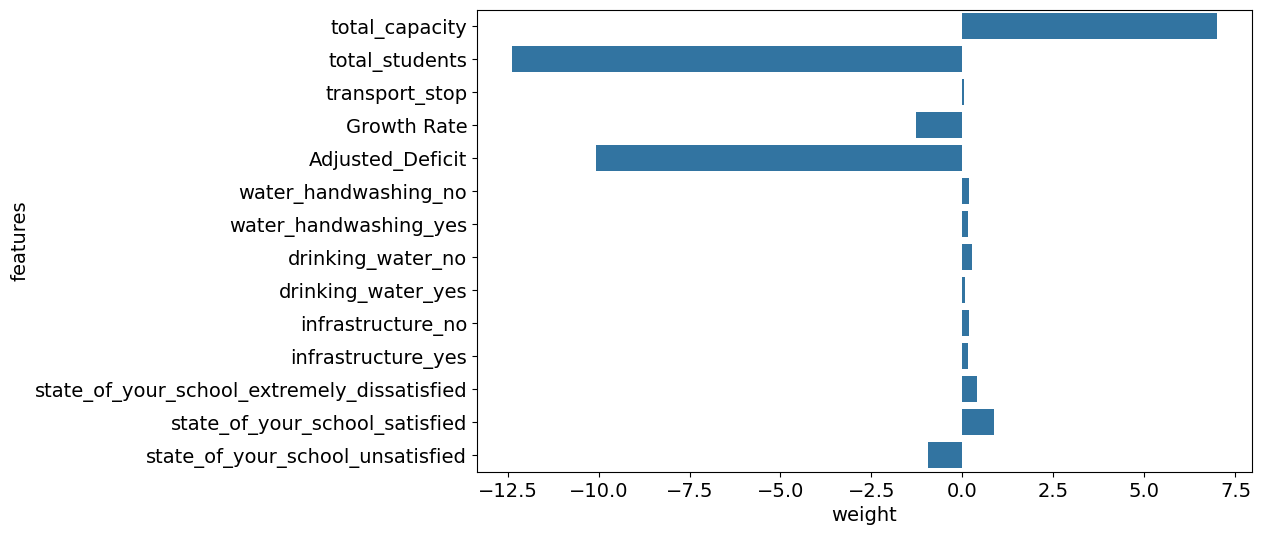

In [66]:
# visualizing the weights given to each feature
sns.barplot(data=feature_weight_df, x='weight', y='features')


In [67]:
print(model_1.intercept_)

[ 1.30386065 -0.18984904 -1.11401162]


In [68]:
# Predict on the model
# Let's first predict on the training data only

train_pred = model_1.predict(Xtrain)
train_pred

array(['Green', 'Red', 'Green', ..., 'Green', 'Green', 'Red'],
      dtype=object)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [69]:
# Now let's check the accuracy score on the training prediction
from sklearn.metrics import accuracy_score, confusion_matrix
print(f"Accuracy Score: {accuracy_score(train_target, train_pred)}")
# Let's also check the train probabilities
train_probs = model_1.predict_proba(Xtrain)
print(f"Probability: {train_probs}")

Accuracy Score: 0.861121157323689
Probability: [[0.77187279 0.18107381 0.0470534 ]
 [0.17135042 0.80869251 0.01995707]
 [0.80506834 0.1525189  0.04241276]
 ...
 [0.83255587 0.11226275 0.05518138]
 [0.97224798 0.01240068 0.01535134]
 [0.0011679  0.99555531 0.0032768 ]]


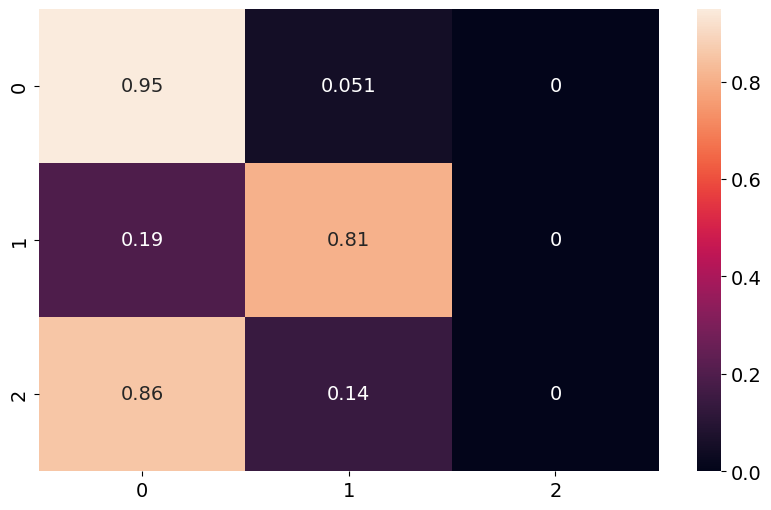

In [70]:
# Visualizing evaluation Metric Score chart
cf = confusion_matrix(train_target, train_pred, normalize='true')
sns.heatmap(cf, annot=True)
plt.show()

Accuracy Score: 0.8548523206751055
Probability: [[0.32755388 0.64590247 0.02654365]
 [0.8027814  0.16315417 0.03406442]
 [0.01450061 0.97871954 0.00677985]
 ...
 [0.12159359 0.83496838 0.04343803]
 [0.81078542 0.13342634 0.05578823]
 [0.52122046 0.37909433 0.09968521]]


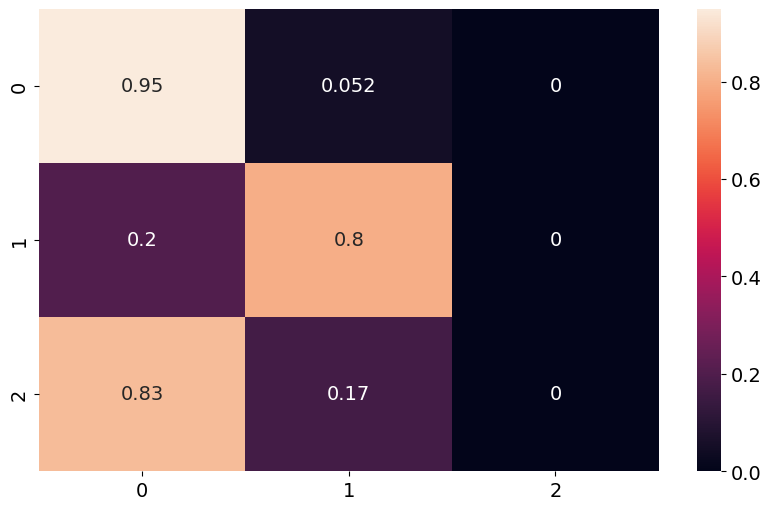

In [71]:
# Now let's make a prediction on the test set
test_pred = model_1.predict(Xtest)
print(f"Accuracy Score: {accuracy_score(test_target, test_pred)}")
# Let's also check the train probabilities
test_probs = model_1.predict_proba(Xtest)
print(f"Probability: {test_probs}")
cf = confusion_matrix(test_target, test_pred, normalize='true')
sns.heatmap(cf, annot=True)
plt.show()

In [72]:
# Checking the performance report
from sklearn.metrics import classification_report
LR_performance_report = classification_report(test_target, test_pred)
print(f"Perforamnce Report : \n{LR_performance_report}")

Perforamnce Report : 
              precision    recall  f1-score   support

       Green       0.84      0.95      0.89      1434
         Red       0.88      0.80      0.84       836
      Yellow       0.00      0.00      0.00       100

    accuracy                           0.85      2370
   macro avg       0.57      0.58      0.58      2370
weighted avg       0.82      0.85      0.84      2370



C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [73]:
# Creating Dataframe of LR results
y_combined = list(ytrain) + list(ytest)
pred_combined = list(train_pred) + list(test_pred)
LR_df = pd.DataFrame({
    'District': y_combined,
    'LR_Results': pred_combined
})

#### Description on the overall performance of the model

Here are the details of the model and it's prediction.
- Model Name: Logistic Regression
- Train Test split: 70% Train 30% Test
- Accuracy Score: 0.85 (test set) Which means our model is 85% Accurate on Test set.
- Accuracy Score: 0.86 (train set) Which means our model is 86% Accurate on Train set.
- Train Confusion Matrix:   [0.94 0.51 0]
                            [0.19 0.81 0]
                            [0.86 0.14 0]
- Test Confusion Matrix:    [0.94 0.05 0]
                            [0.20 0.79 0]
                            [0.83 0.17 0]

- Perforamnce Report : 
              precision      recall     f1-score     support: 
              
       - Green     0.84      0.95  0.89  1434
       - Red       0.88      0.80  0.84   836
       - Yellow    0.00      0.00  0.00   100

### ML Model - 2 - Decision Tree

In [74]:
# ML Model - 2 Implementation
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier(random_state=42)
model_2.fit(Xtrain, train_target)

DecisionTreeClassifier(random_state=42)

In [75]:
# Predicting the results on the trainset
train_pred_2 = model_2.predict(Xtrain)
train_pred_2

array(['Green', 'Red', 'Green', ..., 'Green', 'Green', 'Red'],
      dtype=object)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [76]:
# Now let's check the accuracy score on the training prediction
print(f"Accuracy Score: {accuracy_score(train_target, train_pred_2)}")
# Let's also check the train probabilities
train_probs = model_2.predict_proba(Xtrain)
print(f"Probability: \n{train_probs}")

Accuracy Score: 1.0
Probability: 
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


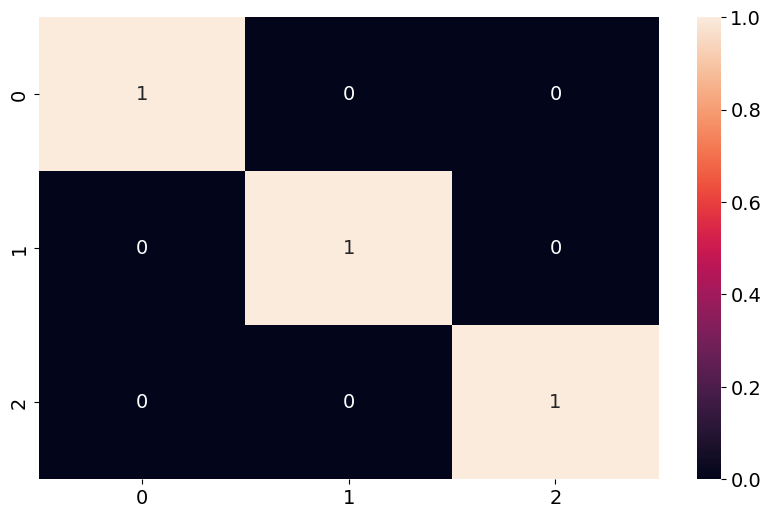

In [77]:
# Visualizing evaluation Metric Score chart
cf = confusion_matrix(train_target, train_pred_2, normalize='true')
sns.heatmap(cf, annot=True)
plt.show()


Accuracy Score: 0.9898734177215189
Probability: [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


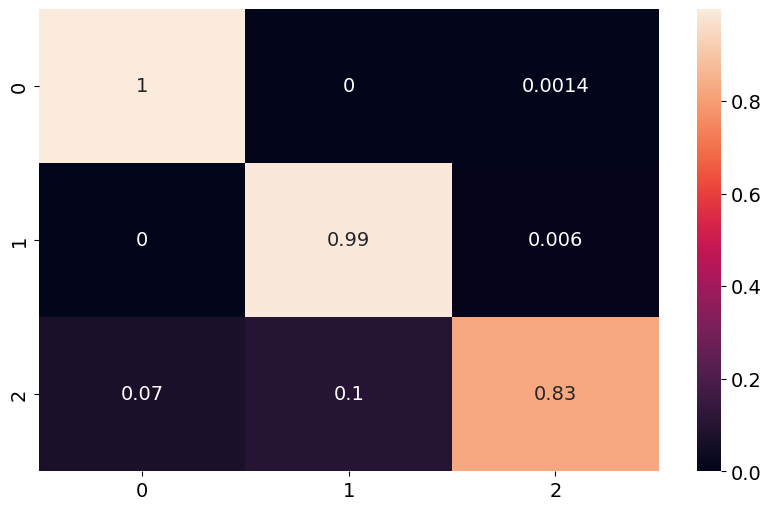

In [78]:
# Now let's make a prediction on the test set
test_pred_2 = model_2.predict(Xtest)
print(f"Accuracy Score: {accuracy_score(test_target, test_pred_2)}")
# Let's also check the train probabilities
test_probs = model_2.predict_proba(Xtest)
print(f"Probability: {test_probs}")
cf = confusion_matrix(test_target, test_pred_2, normalize='true')
sns.heatmap(cf, annot=True)
plt.show()

In [79]:
# Checking the performance report
from sklearn.metrics import classification_report
LR_performance_report = classification_report(test_target, test_pred_2)
print(f"Perforamnce Report : \n{LR_performance_report}")

Perforamnce Report : 
              precision    recall  f1-score   support

       Green       1.00      1.00      1.00      1434
         Red       0.99      0.99      0.99       836
      Yellow       0.92      0.83      0.87       100

    accuracy                           0.99      2370
   macro avg       0.97      0.94      0.95      2370
weighted avg       0.99      0.99      0.99      2370



In [80]:
# Creating Dataframe of DT results
y_combined = list(ytrain) + list(ytest)
pred_2_combined = list(train_pred_2) + list(test_pred_2)
DT_df = pd.DataFrame({
    'District': y_combined,
    'DT_Results': pred_2_combined
})

#### 2. Description on the overall performance of the model

Here are the details of the model and it's prediction.
- Model Name: Decision Tree
- Train Test split: 70% Train 30% Test
- Accuracy Score: 0.99 (test set) Which means our model is 99% Accurate on Test set.
- Accuracy Score: 1.0 (train set) Which means our model is 100% Accurate on Train set.
- Train Confusion Matrix:

              - [1 0 0]
              - [0 1 0]
              - [0 0 1]
- Test Confusion Matrix:
    
              - [1    0    0.01]
              - [0    0.99 0.06]
              - [0.07 0.10 0.83]

- Perforamnce Report : 
                            
                            precision    recall  f1-score  support:
                     - Green     1.00     1.00    1.00      1434
                     - Red       0.99     0.99    0.99       836
                     - Yellow    0.92     0.83    0.87       100

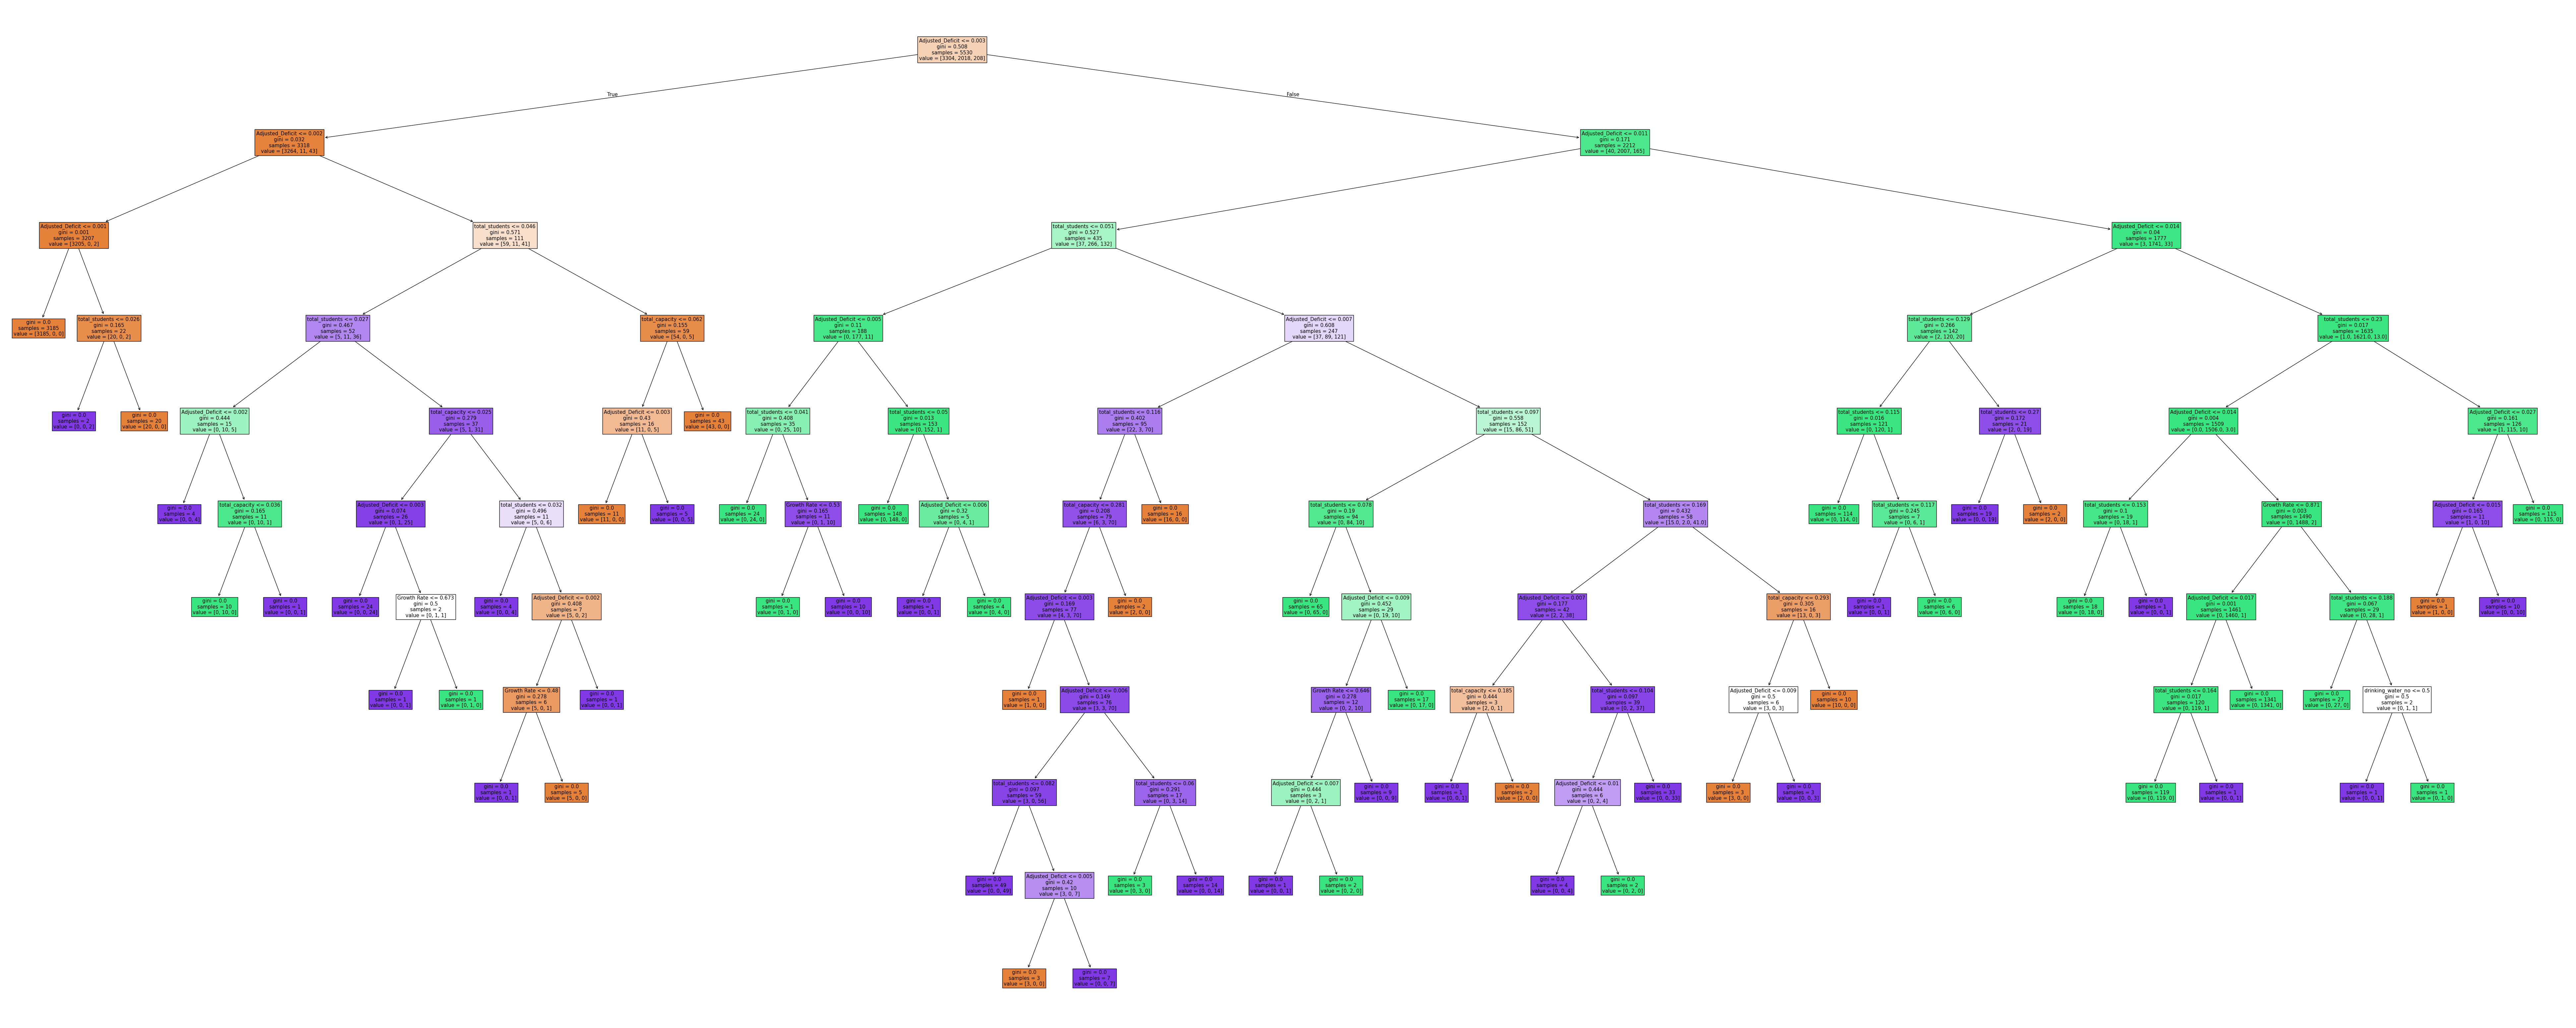

In [81]:
# Visualizing our decision tree
from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(100,40))
plot_tree(model_2, feature_names=Xtrain.columns, filled=True)
plt.show()

<Axes: title={'center': 'Top 10 most important features in our DT'}, xlabel='Importance', ylabel='Feature'>

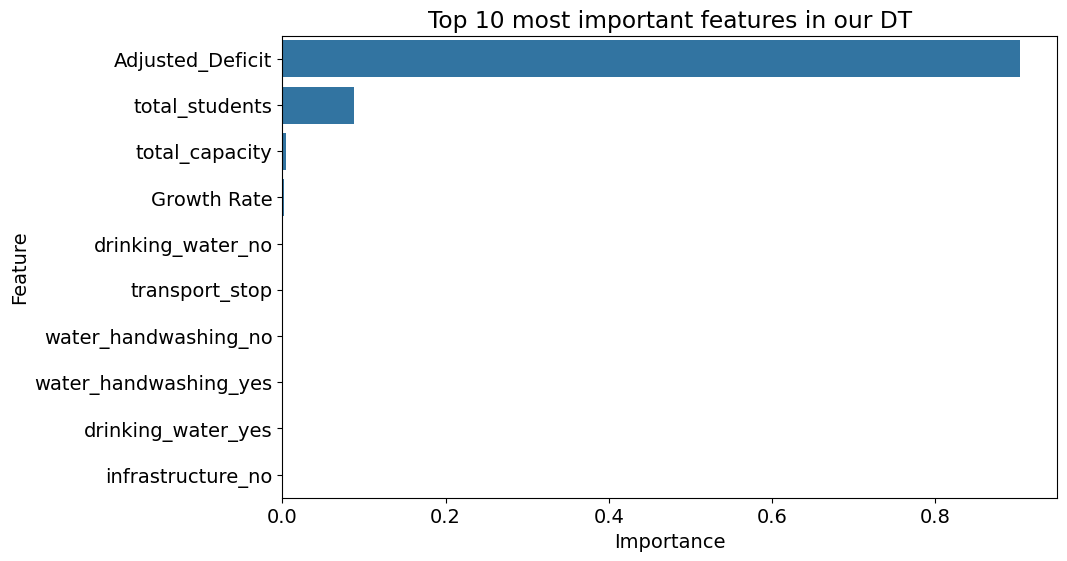

In [82]:
# Checking importance feature
DT_importance_df = pd.DataFrame({
    'Feature': Xtrain.columns,
    'Importance': model_2.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.title('Top 10 most important features in our DT')
sns.barplot(data=DT_importance_df.head(10), x='Importance', y='Feature')

### ML Model - 3 - Random Forest

In [83]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier(random_state=42)
model_3.fit(Xtrain, train_target)

RandomForestClassifier(random_state=42)

In [84]:
# Predicting the results on the trainset
train_pred_3 = model_3.predict(Xtrain)
train_pred_3

array(['Green', 'Red', 'Green', ..., 'Green', 'Green', 'Red'],
      dtype=object)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [85]:
# Visualizing evaluation Metric Score chart
# Now let's check the accuracy score on the training prediction
print(f"Accuracy Score: {accuracy_score(train_target, train_pred_3)}")
# Let's also check the train probabilities
train_probs = model_3.predict_proba(Xtrain)
print(f"Probability: \n{train_probs}")

Accuracy Score: 1.0
Probability: 
[[1.   0.   0.  ]
 [0.02 0.85 0.13]
 [0.99 0.   0.01]
 ...
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]]


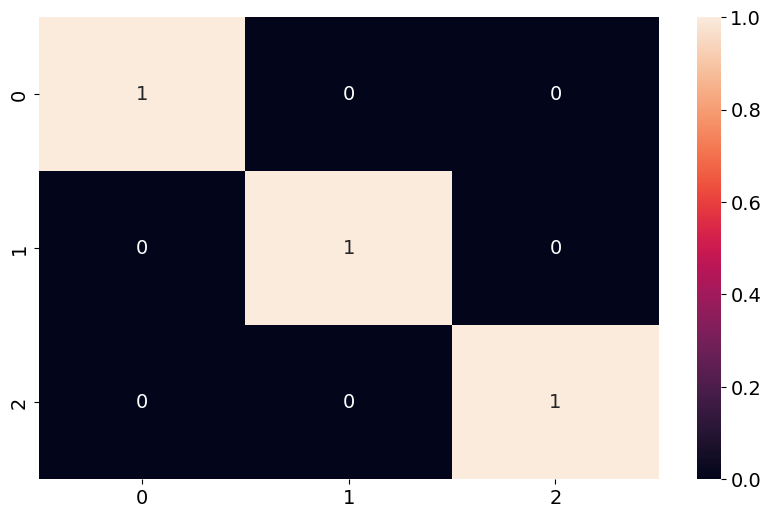

In [86]:
# Visualizing evaluation Metric Score chart
cf = confusion_matrix(train_target, train_pred_3, normalize='true')
sns.heatmap(cf, annot=True)
plt.show()

Accuracy Score: 0.9818565400843882
Probability: 
[[0.94 0.05 0.01]
 [0.98 0.02 0.  ]
 [0.   1.   0.  ]
 ...
 [0.02 0.97 0.01]
 [0.98 0.   0.02]
 [0.04 0.79 0.17]]


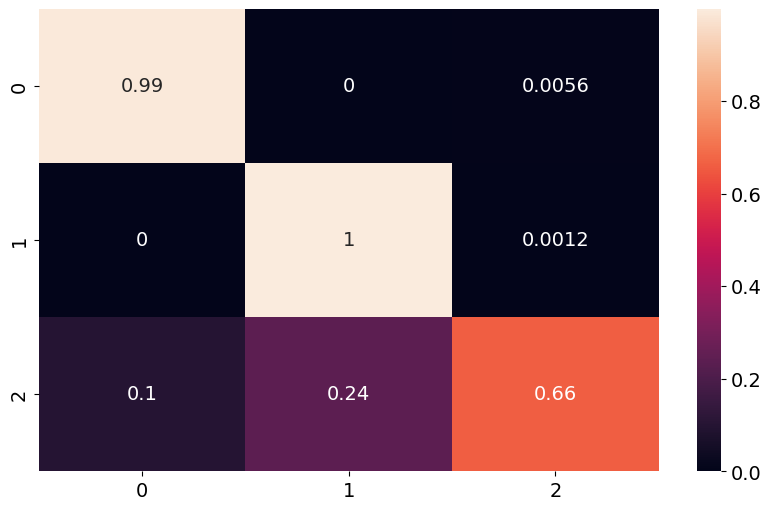

In [87]:
# Now let's make a prediction on the test set
test_pred_3 = model_3.predict(Xtest)
print(f"Accuracy Score: {accuracy_score(test_target, test_pred_3)}")
# Let's also check the train probabilities
test_probs = model_3.predict_proba(Xtest)
print(f"Probability: \n{test_probs}")
cf = confusion_matrix(test_target, test_pred_3, normalize='true')
sns.heatmap(cf, annot=True)
plt.show()

In [88]:
# Checking the performance report
from sklearn.metrics import classification_report
RF_performance_report = classification_report(test_target, test_pred_3)
print(f"Perforamnce Report : \n{RF_performance_report}")

Perforamnce Report : 
              precision    recall  f1-score   support

       Green       0.99      0.99      0.99      1434
         Red       0.97      1.00      0.99       836
      Yellow       0.88      0.66      0.75       100

    accuracy                           0.98      2370
   macro avg       0.95      0.88      0.91      2370
weighted avg       0.98      0.98      0.98      2370



In [89]:
# Creating Dataframe of RF results
y_combined = list(ytrain) + list(ytest)
pred_3_combined = list(train_pred_3) + list(test_pred_3)
RF_df = pd.DataFrame({
    'District': y_combined,
    'RF_Results': pred_3_combined
})

#### 2. Description on the overall performance of the model

Here are the details of the model and it's prediction.
- Model Name: Random Forest
- Train Test split: 70% Train 30% Test
- Accuracy Score: 0.98 (test set) Which means our model is 98% Accurate on Test set.
- Accuracy Score: 1.0 (train set) Which means our model is 100% Accurate on Train set.
- Train Confusion Matrix:

              - [1 0 0]
              - [0 1 0]
              - [0 0 1]
- Test Confusion Matrix: 

              - [0.99  0     0.05]
              - [0     1     0.01]
              - [0.07  0.10  0.66]

- Perforamnce Report : 
                      
                     - Matrix: precision  recall f1-score  support
                     - Green     0.99     0.99    0.99      1434
                     - Red       0.97     1.00    0.99       836
                     - Yellow    0.88     0.66    0.75       100

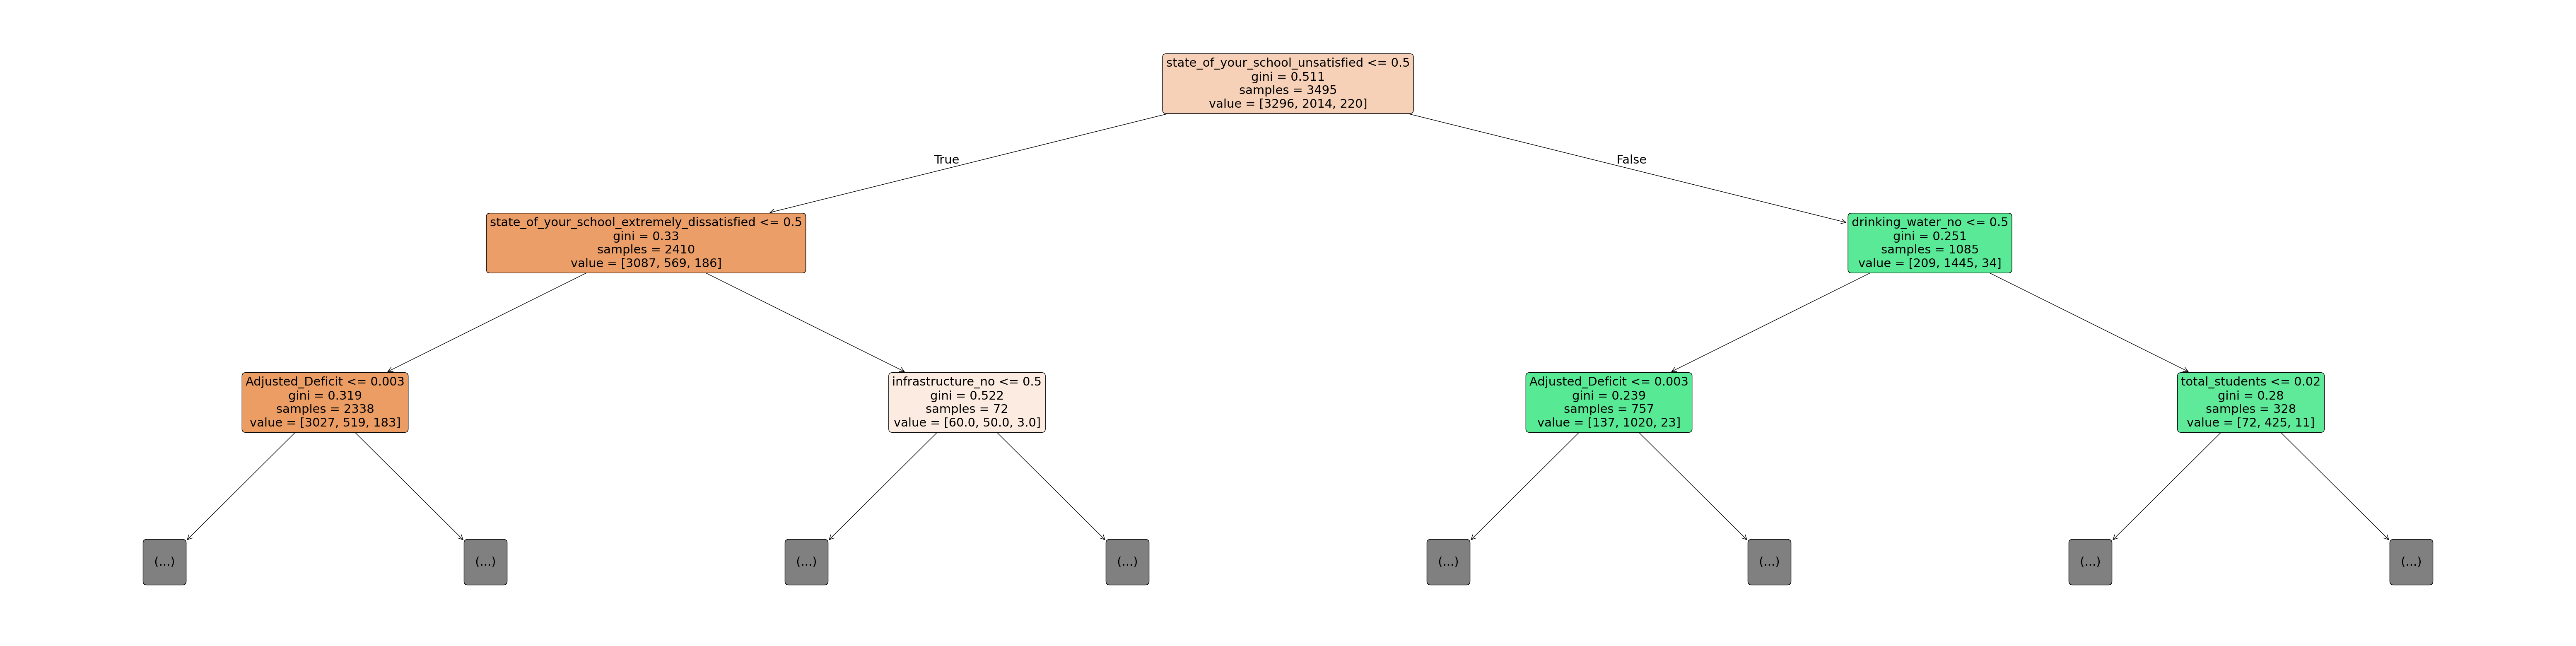

In [90]:
# Visualizing the Random Forest Estimators
# Plotting DT 0 
plt.figure(figsize=(80,20))
plot_tree(model_3.estimators_[0], max_depth=2, feature_names=Xtrain.columns, filled=True, rounded=True)
plt.show()

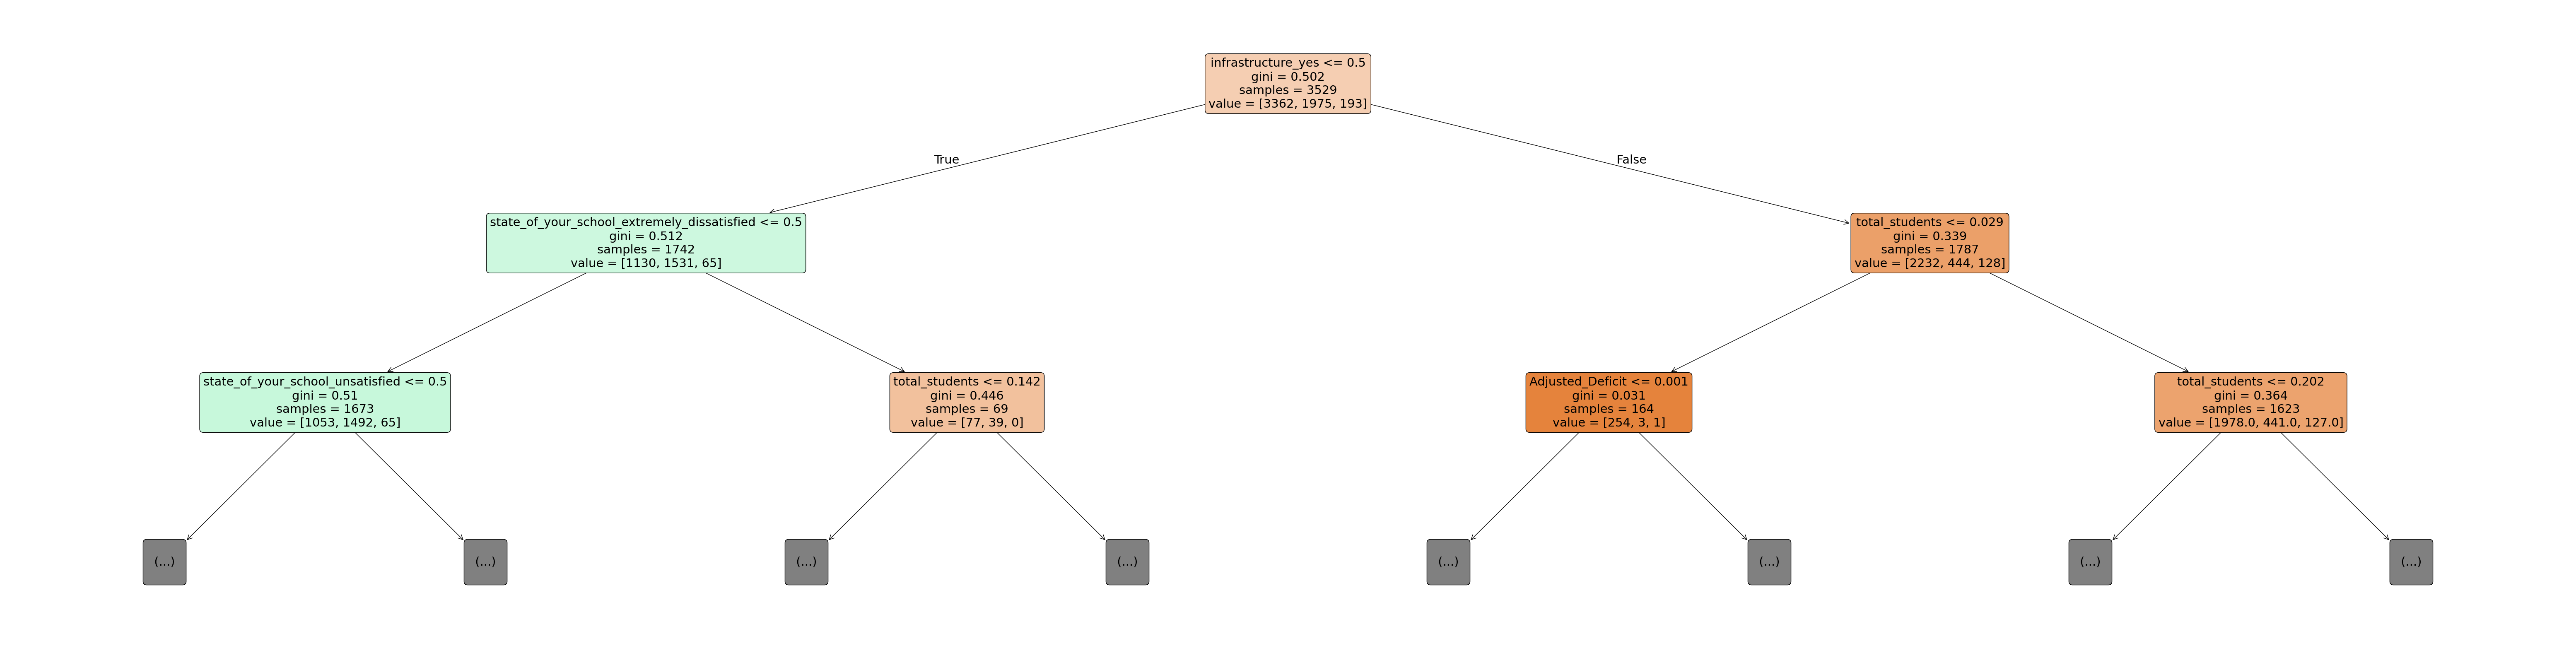

In [91]:
# Plotting DT 20

plt.figure(figsize=(80,20))
plot_tree(model_3.estimators_[20], max_depth=2, feature_names=Xtrain.columns, filled=True, rounded=True)
plt.show()

<Axes: title={'center': 'Top 10 most important features in our RF'}, xlabel='Importance', ylabel='Feature'>

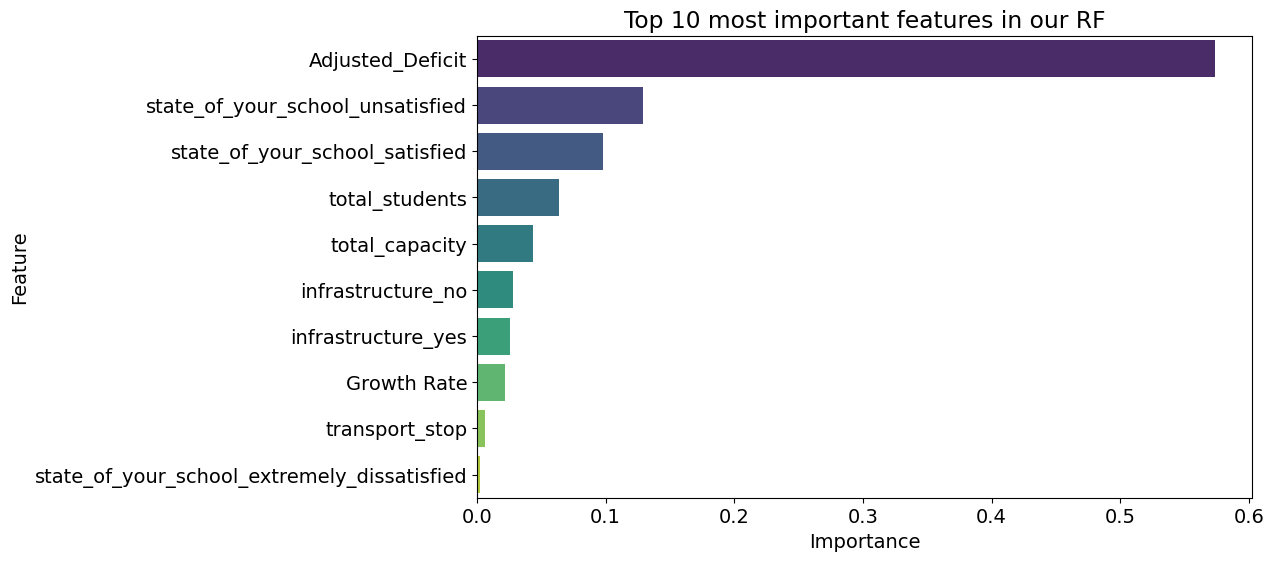

In [92]:
# Checking importance feature of RF
RF_importance_df = pd.DataFrame({
    'Feature': Xtrain.columns,
    'Importance': model_3.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.title('Top 10 most important features in our RF')
plt.style.use('dark_background')
colors = sns.color_palette("viridis", n_colors=10)
sns.barplot(data=RF_importance_df.head(10), x='Importance', y='Feature', palette=colors, hue='Feature')

### ML Model - 4 - Naive Bayes

In [93]:
# ML Model - 4 Implementation
from sklearn.naive_bayes import GaussianNB
model_4 = GaussianNB()
model_4.fit(Xtrain, train_target)

GaussianNB()

In [94]:
# Predicting the results on the trainset
train_pred_4 = model_4.predict(Xtrain)
train_pred_4

array(['Green', 'Red', 'Green', ..., 'Green', 'Green', 'Red'], dtype='<U6')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [95]:
# Visualizing evaluation Metric Score chart
# Now let's check the accuracy score on the training prediction
print(f"Accuracy Score: {accuracy_score(train_target, train_pred_4)}")
# Let's also check the train probabilities
train_probs = model_4.predict_proba(Xtrain)
print(f"Probability: \n{train_probs}")

Accuracy Score: 0.8851717902350814
Probability: 
[[9.95682224e-001 4.45613446e-004 3.87216280e-003]
 [3.12385069e-015 9.99176739e-001 8.23260932e-004]
 [9.95738908e-001 4.36123500e-004 3.82496806e-003]
 ...
 [9.96398360e-001 4.35327331e-006 3.59728643e-003]
 [9.98846832e-001 2.62116506e-006 1.15054650e-003]
 [0.00000000e+000 1.00000000e+000 3.18432274e-292]]


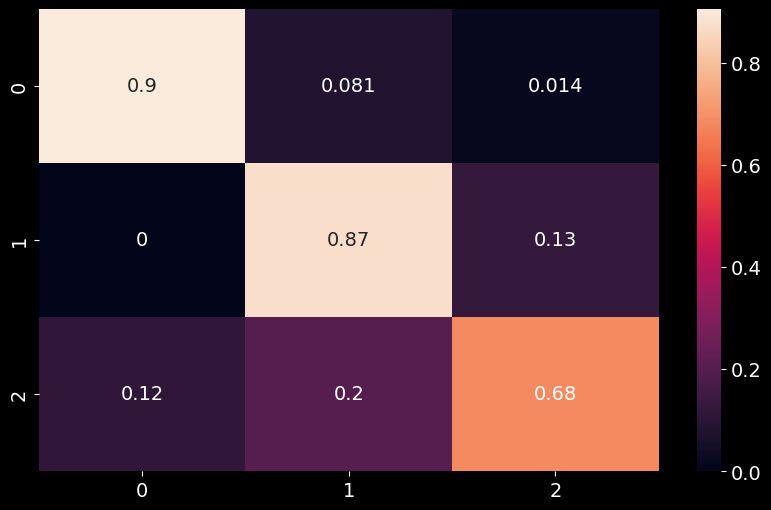

In [96]:
# Visualizing evaluation Metric Score chart
cf = confusion_matrix(train_target, train_pred_4, normalize='true')
plt.style.use('dark_background')
sns.heatmap(cf, annot=True)
plt.show()

Accuracy Score: 0.8729957805907173
Probability: 
[[1.46723725e-004 9.99475781e-001 3.77495078e-004]
 [9.96946595e-001 2.37678730e-003 6.76617549e-004]
 [0.00000000e+000 1.00000000e+000 7.43865483e-096]
 ...
 [2.15834580e-298 9.99998061e-001 1.93938847e-006]
 [9.96831106e-001 3.92119926e-006 3.16497315e-003]
 [0.00000000e+000 9.99998523e-001 1.47736998e-006]]


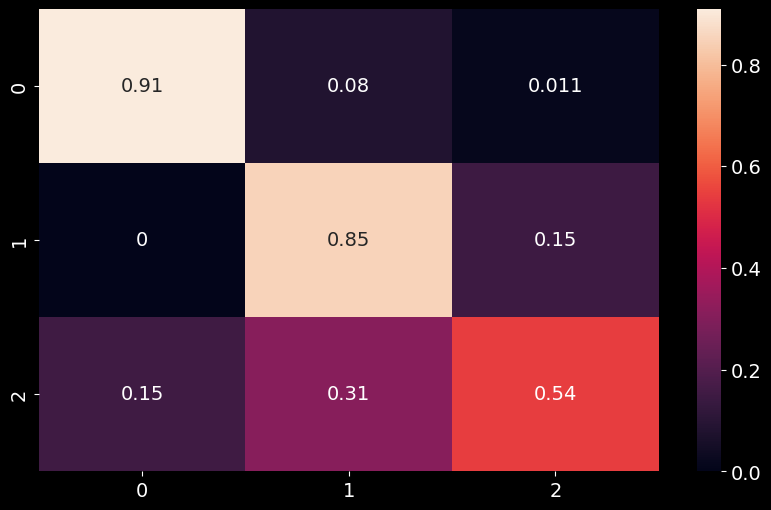

In [97]:
# Now let's make a prediction on the test set
test_pred_4 = model_4.predict(Xtest)
print(f"Accuracy Score: {accuracy_score(test_target, test_pred_4)}")
# Let's also check the train probabilities
test_probs = model_4.predict_proba(Xtest)
print(f"Probability: \n{test_probs}")
cf = confusion_matrix(test_target, test_pred_4, normalize='true')
plt.style.use('dark_background')
sns.heatmap(cf, annot=True)
plt.show()

In [98]:
# Checking the performance report
from sklearn.metrics import classification_report
NB_performance_report = classification_report(test_target, test_pred_4)
print(f"Perforamnce Report : \n{NB_performance_report}")

Perforamnce Report : 
              precision    recall  f1-score   support

       Green       0.99      0.91      0.95      1434
         Red       0.83      0.85      0.84       836
      Yellow       0.28      0.54      0.37       100

    accuracy                           0.87      2370
   macro avg       0.70      0.77      0.72      2370
weighted avg       0.90      0.87      0.88      2370



In [99]:
# Creating Dataframe of NB results
y_combined = list(ytrain) + list(ytest)
pred_4_combined = list(train_pred_4) + list(test_pred_4)
NB_df = pd.DataFrame({
    'District': y_combined,
    'NB_Results': pred_4_combined
})

#### 2. Description on the overall performance of the model

Here are the details of the model and it's prediction.
- Model Name: Naive Bayes
- Train Test split: 70% Train 30% Test
- Accuracy Score: 0.87 (test set) Which means our model is 87% Accurate on Test set.
- Accuracy Score: 0.88 (train set) Which means our model is 88% Accurate on Train set.
- Train Confusion Matrix:

              - [0.9 0.08 0.01]
              - [0.0 0.87 0.13]
              - [0.12 0.2 0.68]
- Test Confusion Matrix: 

              - [0.91  0.8   0.01]
              - [0.00  0.85  0.15]
              - [0.15  0.31  0.54]

- Perforamnce Report : 
                      
                     - Matrix: precision  recall f1-score  support
                     - Green     0.99     0.91    0.95      1434
                     - Red       0.83     0.85    0.84       836
                     - Yellow    0.28     0.54    0.37       100

### Performance Graph

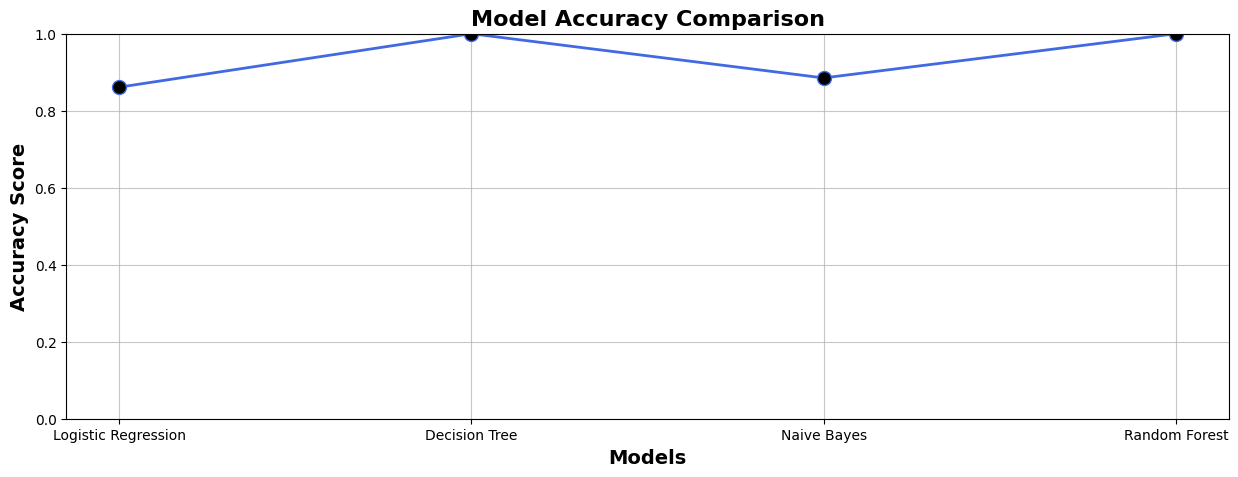

In [100]:
# Plotting performance graph of each of our model
lr_acc = accuracy_score(train_target, train_pred)
dt_acc = accuracy_score(train_target, train_pred_2)
rf_acc = accuracy_score(train_target, train_pred_3)
nb_acc = accuracy_score(train_target, train_pred_4)

plt.style.use('default')
plt.figure(figsize=(15, 5))
models = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest']
test_accuracy = [lr_acc, dt_acc, nb_acc, rf_acc]
plt.plot(models, test_accuracy, marker='o', linestyle='-', color='#4169e1', linewidth=2, markersize=10, markerfacecolor='black')
plt.ylim(0.0, 1.0)


plt.ylabel("Accuracy Score", fontsize=14, fontweight='bold')
plt.xlabel("Models", fontsize=14, fontweight='bold')
plt.title("Model Accuracy Comparison", fontsize=16, fontweight='bold')
plt.grid(True, linestyle='-', alpha=0.7)
plt.show()

### Saving all the results in 1 file

In [101]:
with pd.ExcelWriter('result_data.xlsx', engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='Main Data', index=False)
    feature_weight_df.to_excel(writer, sheet_name='LR_Weights', index=False)
    LR_df.to_excel(writer, sheet_name='LR Results', index=False)
    DT_df.to_excel(writer, sheet_name='DT Results', index=False)
    DT_importance_df.to_excel(writer, sheet_name='DT Feature Importance', index=False)
    RF_df.to_excel(writer, sheet_name='RF Results', index=False)
    RF_importance_df.to_excel(writer, sheet_name='RF Feature Importance', index=False)
    NB_df.to_excel(writer, sheet_name='NB Results', index=False)

### ***Model Creation has been successfully completed. The details and other summary will be given in the report file.***

### ***Thank you !!!***